In [39]:
from bmtk.builder.networks import NetworkBuilder


cortex = NetworkBuilder('cortex')
cortex.add_nodes(
    cell_name='626170421',
    potental='exc',
    model_type='biophysical',
    model_template='ctdb:Biophys1.hoc',
    model_processing='aibs_perisomatic',
    dynamics_params='fit_parameters.json',
    morphology='reconstruction.swc'
)


In [40]:
cortex.build()
cortex.save_nodes(output_dir='my_sim02/network')

In [41]:
thalamus = NetworkBuilder('mthalamus')
thalamus.add_nodes(
    N=10,
    pop_name='tON',
    potential='exc',
    model_type='virtual'
)

In [42]:
thalamus.add_edges(
    source={'pop_name': 'tON'}, target=cortex.nodes(),
    connection_rule=5,
    syn_weight=0.001,
    delay=2.0,
    weight_function=None,
    target_sections=['basal', 'apical'],
    distance_range=[0.0, 150.0],
    dynamics_params='AMPA_ExcToExc.json',
    model_template='exp2syn'
)

In [43]:
thalamus.build()
thalamus.save_nodes(output_dir='my_sim02/network')
thalamus.save_edges(output_dir='my_sim02/network')

In [44]:
from bmtk.utils.reports.spike_trains import PoissonSpikeGenerator

psg = PoissonSpikeGenerator(population='mthalamus')
psg.add(
    node_ids=range(10),  
    firing_rate=10.0,    
    times=(0.0, 3.0)    
)
psg.to_sonata('my_sim02/inputs/neuropixel_electrode_1um.csv')

In [45]:
print('Number of spikes: {}'.format(psg.n_spikes()))
print('Units: {}'.format(psg.units()))

psg.to_dataframe().head()

Number of spikes: 299
Units: ms


,node_ids,timestamps,population
0,0,189.497613,mthalamus
1,0,362.034074,mthalamus
2,0,415.565121,mthalamus
3,0,451.444547,mthalamus
4,0,518.789515,mthalamus


In [46]:
from bmtk.utils.sim_setup import build_env_bionet

build_env_bionet(
    base_dir='my_sim02',
    config_file='config.json',
    network_dir='my_sim02/network',
    tstop=3000.0, dt=0.1,
    report_vars=['v', 'cai'],    
    spikes_inputs=[('mthalamus', 
                    'my_sim02/inputs/mthalamus_spikes.h5')],
    compile_mechanisms=True      
)

/opt/miniconda3/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set


/usr/bin/xcrun
/Users/ninazhang/Desktop/NZ/my_sim02/components/mechanisms
Mod files: "modfiles/modfiles/CaDynamics.mod" "modfiles/modfiles/Ca_HVA.mod" "modfiles/modfiles/Ca_LVA.mod" "modfiles/modfiles/Ih.mod" "modfiles/modfiles/Im.mod" "modfiles/modfiles/Im_v2.mod" "modfiles/modfiles/K_P.mod" "modfiles/modfiles/K_T.mod" "modfiles/modfiles/Kd.mod" "modfiles/modfiles/Kv2like.mod" "modfiles/modfiles/Kv3_1.mod" "modfiles/modfiles/NaTa.mod" "modfiles/modfiles/NaTs.mod" "modfiles/modfiles/NaV.mod" "modfiles/modfiles/Nap.mod" "modfiles/modfiles/SK.mod" "modfiles/modfiles/vecevent.mod"

 -> Compiling mod_func.cpp
 => LINKING shared library ./libnrnmech.dylib
Successfully created x86_64/special


In [47]:
from bmtk.simulator import bionet
from neuron import h

pc = h.ParallelContext()

if pc.gid_exists(0):  
    pc.gid_clear(0)  

conf = bionet.Config.from_json('my_sim02/config.json')
conf.build_env()
net = bionet.BioNetwork.from_config(conf)
sim = bionet.BioSimulator.from_config(conf, network=net)
sim.run()

pc.done()

2024-10-08 18:11:49,301 [INFO] Created log file


INFO:NEURONIOUtils:Created log file


Mechanisms already loaded from path: /Users/ninazhang/Desktop/NZ/my_sim02/components/mechanisms.  Aborting.
2024-10-08 18:11:49,350 [INFO] Building cells.


INFO:NEURONIOUtils:Building cells.


2024-10-08 18:11:49,556 [INFO] Building recurrent connections


INFO:NEURONIOUtils:Building recurrent connections


2024-10-08 18:11:49,563 [INFO] Building virtual cell stimulations for mthalamus_spikes


INFO:NEURONIOUtils:Building virtual cell stimulations for mthalamus_spikes


2024-10-08 18:11:49,594 [INFO] Running simulation for 3000.000 ms with the time step 0.001 ms


INFO:NEURONIOUtils:Running simulation for 3000.000 ms with the time step 0.001 ms


2024-10-08 18:11:49,595 [INFO] Starting timestep: 0 at t_sim: 0.000 ms


INFO:NEURONIOUtils:Starting timestep: 0 at t_sim: 0.000 ms


2024-10-08 18:11:49,596 [INFO] Block save every 5000 steps


INFO:NEURONIOUtils:Block save every 5000 steps


2024-10-08 18:11:49,808 [INFO]     step:5000 t_sim:5.00 ms


INFO:NEURONIOUtils:    step:5000 t_sim:5.00 ms


2024-10-08 18:11:50,021 [INFO]     step:10000 t_sim:10.00 ms


INFO:NEURONIOUtils:    step:10000 t_sim:10.00 ms


2024-10-08 18:11:50,180 [INFO]     step:15000 t_sim:15.00 ms


INFO:NEURONIOUtils:    step:15000 t_sim:15.00 ms


2024-10-08 18:11:50,337 [INFO]     step:20000 t_sim:20.00 ms


INFO:NEURONIOUtils:    step:20000 t_sim:20.00 ms


2024-10-08 18:11:50,498 [INFO]     step:25000 t_sim:25.00 ms


INFO:NEURONIOUtils:    step:25000 t_sim:25.00 ms


2024-10-08 18:11:50,672 [INFO]     step:30000 t_sim:30.00 ms


INFO:NEURONIOUtils:    step:30000 t_sim:30.00 ms


2024-10-08 18:11:50,865 [INFO]     step:35000 t_sim:35.00 ms


INFO:NEURONIOUtils:    step:35000 t_sim:35.00 ms


2024-10-08 18:11:51,027 [INFO]     step:40000 t_sim:40.00 ms


INFO:NEURONIOUtils:    step:40000 t_sim:40.00 ms


2024-10-08 18:11:51,200 [INFO]     step:45000 t_sim:45.00 ms


INFO:NEURONIOUtils:    step:45000 t_sim:45.00 ms


2024-10-08 18:11:51,384 [INFO]     step:50000 t_sim:50.00 ms


INFO:NEURONIOUtils:    step:50000 t_sim:50.00 ms


2024-10-08 18:11:51,544 [INFO]     step:55000 t_sim:55.00 ms


INFO:NEURONIOUtils:    step:55000 t_sim:55.00 ms


2024-10-08 18:11:51,716 [INFO]     step:60000 t_sim:60.00 ms


INFO:NEURONIOUtils:    step:60000 t_sim:60.00 ms


2024-10-08 18:11:51,916 [INFO]     step:65000 t_sim:65.00 ms


INFO:NEURONIOUtils:    step:65000 t_sim:65.00 ms


2024-10-08 18:11:52,086 [INFO]     step:70000 t_sim:70.00 ms


INFO:NEURONIOUtils:    step:70000 t_sim:70.00 ms


2024-10-08 18:11:52,274 [INFO]     step:75000 t_sim:75.00 ms


INFO:NEURONIOUtils:    step:75000 t_sim:75.00 ms


2024-10-08 18:11:52,430 [INFO]     step:80000 t_sim:80.00 ms


INFO:NEURONIOUtils:    step:80000 t_sim:80.00 ms


2024-10-08 18:11:52,590 [INFO]     step:85000 t_sim:85.00 ms


INFO:NEURONIOUtils:    step:85000 t_sim:85.00 ms


2024-10-08 18:11:52,743 [INFO]     step:90000 t_sim:90.00 ms


INFO:NEURONIOUtils:    step:90000 t_sim:90.00 ms


2024-10-08 18:11:52,901 [INFO]     step:95000 t_sim:95.00 ms


INFO:NEURONIOUtils:    step:95000 t_sim:95.00 ms


2024-10-08 18:11:53,059 [INFO]     step:100000 t_sim:100.00 ms


INFO:NEURONIOUtils:    step:100000 t_sim:100.00 ms


2024-10-08 18:11:53,227 [INFO]     step:105000 t_sim:105.00 ms


INFO:NEURONIOUtils:    step:105000 t_sim:105.00 ms


2024-10-08 18:11:53,390 [INFO]     step:110000 t_sim:110.00 ms


INFO:NEURONIOUtils:    step:110000 t_sim:110.00 ms


2024-10-08 18:11:53,552 [INFO]     step:115000 t_sim:115.00 ms


INFO:NEURONIOUtils:    step:115000 t_sim:115.00 ms


2024-10-08 18:11:53,729 [INFO]     step:120000 t_sim:120.00 ms


INFO:NEURONIOUtils:    step:120000 t_sim:120.00 ms


2024-10-08 18:11:53,924 [INFO]     step:125000 t_sim:125.00 ms


INFO:NEURONIOUtils:    step:125000 t_sim:125.00 ms


2024-10-08 18:11:54,085 [INFO]     step:130000 t_sim:130.00 ms


INFO:NEURONIOUtils:    step:130000 t_sim:130.00 ms


2024-10-08 18:11:54,254 [INFO]     step:135000 t_sim:135.00 ms


INFO:NEURONIOUtils:    step:135000 t_sim:135.00 ms


2024-10-08 18:11:54,413 [INFO]     step:140000 t_sim:140.00 ms


INFO:NEURONIOUtils:    step:140000 t_sim:140.00 ms


2024-10-08 18:11:54,571 [INFO]     step:145000 t_sim:145.00 ms


INFO:NEURONIOUtils:    step:145000 t_sim:145.00 ms


2024-10-08 18:11:54,727 [INFO]     step:150000 t_sim:150.00 ms


INFO:NEURONIOUtils:    step:150000 t_sim:150.00 ms


2024-10-08 18:11:54,951 [INFO]     step:155000 t_sim:155.00 ms


INFO:NEURONIOUtils:    step:155000 t_sim:155.00 ms


2024-10-08 18:11:55,106 [INFO]     step:160000 t_sim:160.00 ms


INFO:NEURONIOUtils:    step:160000 t_sim:160.00 ms


2024-10-08 18:11:55,279 [INFO]     step:165000 t_sim:165.00 ms


INFO:NEURONIOUtils:    step:165000 t_sim:165.00 ms


2024-10-08 18:11:55,473 [INFO]     step:170000 t_sim:170.00 ms


INFO:NEURONIOUtils:    step:170000 t_sim:170.00 ms


2024-10-08 18:11:55,629 [INFO]     step:175000 t_sim:175.00 ms


INFO:NEURONIOUtils:    step:175000 t_sim:175.00 ms


2024-10-08 18:11:55,801 [INFO]     step:180000 t_sim:180.00 ms


INFO:NEURONIOUtils:    step:180000 t_sim:180.00 ms


2024-10-08 18:11:55,957 [INFO]     step:185000 t_sim:185.00 ms


INFO:NEURONIOUtils:    step:185000 t_sim:185.00 ms


2024-10-08 18:11:56,124 [INFO]     step:190000 t_sim:190.00 ms


INFO:NEURONIOUtils:    step:190000 t_sim:190.00 ms


2024-10-08 18:11:56,297 [INFO]     step:195000 t_sim:195.00 ms


INFO:NEURONIOUtils:    step:195000 t_sim:195.00 ms


2024-10-08 18:11:56,455 [INFO]     step:200000 t_sim:200.00 ms


INFO:NEURONIOUtils:    step:200000 t_sim:200.00 ms


2024-10-08 18:11:56,616 [INFO]     step:205000 t_sim:205.00 ms


INFO:NEURONIOUtils:    step:205000 t_sim:205.00 ms


2024-10-08 18:11:56,776 [INFO]     step:210000 t_sim:210.00 ms


INFO:NEURONIOUtils:    step:210000 t_sim:210.00 ms


2024-10-08 18:11:56,933 [INFO]     step:215000 t_sim:215.00 ms


INFO:NEURONIOUtils:    step:215000 t_sim:215.00 ms


2024-10-08 18:11:57,094 [INFO]     step:220000 t_sim:220.00 ms


INFO:NEURONIOUtils:    step:220000 t_sim:220.00 ms


2024-10-08 18:11:57,277 [INFO]     step:225000 t_sim:225.00 ms


INFO:NEURONIOUtils:    step:225000 t_sim:225.00 ms


2024-10-08 18:11:57,459 [INFO]     step:230000 t_sim:230.00 ms


INFO:NEURONIOUtils:    step:230000 t_sim:230.00 ms


2024-10-08 18:11:57,627 [INFO]     step:235000 t_sim:235.00 ms


INFO:NEURONIOUtils:    step:235000 t_sim:235.00 ms


2024-10-08 18:11:57,797 [INFO]     step:240000 t_sim:240.00 ms


INFO:NEURONIOUtils:    step:240000 t_sim:240.00 ms


2024-10-08 18:11:58,007 [INFO]     step:245000 t_sim:245.00 ms


INFO:NEURONIOUtils:    step:245000 t_sim:245.00 ms


2024-10-08 18:11:58,171 [INFO]     step:250000 t_sim:250.00 ms


INFO:NEURONIOUtils:    step:250000 t_sim:250.00 ms


2024-10-08 18:11:58,338 [INFO]     step:255000 t_sim:255.00 ms


INFO:NEURONIOUtils:    step:255000 t_sim:255.00 ms


2024-10-08 18:11:58,513 [INFO]     step:260000 t_sim:260.00 ms


INFO:NEURONIOUtils:    step:260000 t_sim:260.00 ms


2024-10-08 18:11:58,676 [INFO]     step:265000 t_sim:265.00 ms


INFO:NEURONIOUtils:    step:265000 t_sim:265.00 ms


2024-10-08 18:11:58,843 [INFO]     step:270000 t_sim:270.00 ms


INFO:NEURONIOUtils:    step:270000 t_sim:270.00 ms


2024-10-08 18:11:58,999 [INFO]     step:275000 t_sim:275.00 ms


INFO:NEURONIOUtils:    step:275000 t_sim:275.00 ms


2024-10-08 18:11:59,164 [INFO]     step:280000 t_sim:280.00 ms


INFO:NEURONIOUtils:    step:280000 t_sim:280.00 ms


2024-10-08 18:11:59,333 [INFO]     step:285000 t_sim:285.00 ms


INFO:NEURONIOUtils:    step:285000 t_sim:285.00 ms


2024-10-08 18:11:59,495 [INFO]     step:290000 t_sim:290.00 ms


INFO:NEURONIOUtils:    step:290000 t_sim:290.00 ms


2024-10-08 18:11:59,694 [INFO]     step:295000 t_sim:295.00 ms


INFO:NEURONIOUtils:    step:295000 t_sim:295.00 ms


2024-10-08 18:11:59,852 [INFO]     step:300000 t_sim:300.00 ms


INFO:NEURONIOUtils:    step:300000 t_sim:300.00 ms


2024-10-08 18:12:00,014 [INFO]     step:305000 t_sim:305.00 ms


INFO:NEURONIOUtils:    step:305000 t_sim:305.00 ms


2024-10-08 18:12:00,192 [INFO]     step:310000 t_sim:310.00 ms


INFO:NEURONIOUtils:    step:310000 t_sim:310.00 ms


2024-10-08 18:12:00,363 [INFO]     step:315000 t_sim:315.00 ms


INFO:NEURONIOUtils:    step:315000 t_sim:315.00 ms


2024-10-08 18:12:00,530 [INFO]     step:320000 t_sim:320.00 ms


INFO:NEURONIOUtils:    step:320000 t_sim:320.00 ms


2024-10-08 18:12:00,699 [INFO]     step:325000 t_sim:325.00 ms


INFO:NEURONIOUtils:    step:325000 t_sim:325.00 ms


2024-10-08 18:12:00,856 [INFO]     step:330000 t_sim:330.00 ms


INFO:NEURONIOUtils:    step:330000 t_sim:330.00 ms


2024-10-08 18:12:01,050 [INFO]     step:335000 t_sim:335.00 ms


INFO:NEURONIOUtils:    step:335000 t_sim:335.00 ms


2024-10-08 18:12:01,258 [INFO]     step:340000 t_sim:340.00 ms


INFO:NEURONIOUtils:    step:340000 t_sim:340.00 ms


2024-10-08 18:12:01,414 [INFO]     step:345000 t_sim:345.00 ms


INFO:NEURONIOUtils:    step:345000 t_sim:345.00 ms


2024-10-08 18:12:01,612 [INFO]     step:350000 t_sim:350.00 ms


INFO:NEURONIOUtils:    step:350000 t_sim:350.00 ms


2024-10-08 18:12:01,773 [INFO]     step:355000 t_sim:355.00 ms


INFO:NEURONIOUtils:    step:355000 t_sim:355.00 ms


2024-10-08 18:12:01,956 [INFO]     step:360000 t_sim:360.00 ms


INFO:NEURONIOUtils:    step:360000 t_sim:360.00 ms


2024-10-08 18:12:02,122 [INFO]     step:365000 t_sim:365.00 ms


INFO:NEURONIOUtils:    step:365000 t_sim:365.00 ms


2024-10-08 18:12:02,283 [INFO]     step:370000 t_sim:370.00 ms


INFO:NEURONIOUtils:    step:370000 t_sim:370.00 ms


2024-10-08 18:12:02,477 [INFO]     step:375000 t_sim:375.00 ms


INFO:NEURONIOUtils:    step:375000 t_sim:375.00 ms


2024-10-08 18:12:02,646 [INFO]     step:380000 t_sim:380.00 ms


INFO:NEURONIOUtils:    step:380000 t_sim:380.00 ms


2024-10-08 18:12:02,807 [INFO]     step:385000 t_sim:385.00 ms


INFO:NEURONIOUtils:    step:385000 t_sim:385.00 ms


2024-10-08 18:12:02,965 [INFO]     step:390000 t_sim:390.00 ms


INFO:NEURONIOUtils:    step:390000 t_sim:390.00 ms


2024-10-08 18:12:03,134 [INFO]     step:395000 t_sim:395.00 ms


INFO:NEURONIOUtils:    step:395000 t_sim:395.00 ms


2024-10-08 18:12:03,296 [INFO]     step:400000 t_sim:400.00 ms


INFO:NEURONIOUtils:    step:400000 t_sim:400.00 ms


2024-10-08 18:12:03,471 [INFO]     step:405000 t_sim:405.00 ms


INFO:NEURONIOUtils:    step:405000 t_sim:405.00 ms


2024-10-08 18:12:03,645 [INFO]     step:410000 t_sim:410.00 ms


INFO:NEURONIOUtils:    step:410000 t_sim:410.00 ms


2024-10-08 18:12:03,811 [INFO]     step:415000 t_sim:415.00 ms


INFO:NEURONIOUtils:    step:415000 t_sim:415.00 ms


2024-10-08 18:12:03,976 [INFO]     step:420000 t_sim:420.00 ms


INFO:NEURONIOUtils:    step:420000 t_sim:420.00 ms


2024-10-08 18:12:04,141 [INFO]     step:425000 t_sim:425.00 ms


INFO:NEURONIOUtils:    step:425000 t_sim:425.00 ms


2024-10-08 18:12:04,302 [INFO]     step:430000 t_sim:430.00 ms


INFO:NEURONIOUtils:    step:430000 t_sim:430.00 ms


2024-10-08 18:12:04,504 [INFO]     step:435000 t_sim:435.00 ms


INFO:NEURONIOUtils:    step:435000 t_sim:435.00 ms


2024-10-08 18:12:04,660 [INFO]     step:440000 t_sim:440.00 ms


INFO:NEURONIOUtils:    step:440000 t_sim:440.00 ms


2024-10-08 18:12:04,837 [INFO]     step:445000 t_sim:445.00 ms


INFO:NEURONIOUtils:    step:445000 t_sim:445.00 ms


2024-10-08 18:12:04,997 [INFO]     step:450000 t_sim:450.00 ms


INFO:NEURONIOUtils:    step:450000 t_sim:450.00 ms


2024-10-08 18:12:05,178 [INFO]     step:455000 t_sim:455.00 ms


INFO:NEURONIOUtils:    step:455000 t_sim:455.00 ms


2024-10-08 18:12:05,358 [INFO]     step:460000 t_sim:460.00 ms


INFO:NEURONIOUtils:    step:460000 t_sim:460.00 ms


2024-10-08 18:12:05,527 [INFO]     step:465000 t_sim:465.00 ms


INFO:NEURONIOUtils:    step:465000 t_sim:465.00 ms


2024-10-08 18:12:05,688 [INFO]     step:470000 t_sim:470.00 ms


INFO:NEURONIOUtils:    step:470000 t_sim:470.00 ms


2024-10-08 18:12:05,854 [INFO]     step:475000 t_sim:475.00 ms


INFO:NEURONIOUtils:    step:475000 t_sim:475.00 ms


2024-10-08 18:12:06,022 [INFO]     step:480000 t_sim:480.00 ms


INFO:NEURONIOUtils:    step:480000 t_sim:480.00 ms


2024-10-08 18:12:06,190 [INFO]     step:485000 t_sim:485.00 ms


INFO:NEURONIOUtils:    step:485000 t_sim:485.00 ms


2024-10-08 18:12:06,372 [INFO]     step:490000 t_sim:490.00 ms


INFO:NEURONIOUtils:    step:490000 t_sim:490.00 ms


2024-10-08 18:12:06,548 [INFO]     step:495000 t_sim:495.00 ms


INFO:NEURONIOUtils:    step:495000 t_sim:495.00 ms


2024-10-08 18:12:06,716 [INFO]     step:500000 t_sim:500.00 ms


INFO:NEURONIOUtils:    step:500000 t_sim:500.00 ms


2024-10-08 18:12:06,942 [INFO]     step:505000 t_sim:505.00 ms


INFO:NEURONIOUtils:    step:505000 t_sim:505.00 ms


2024-10-08 18:12:07,111 [INFO]     step:510000 t_sim:510.00 ms


INFO:NEURONIOUtils:    step:510000 t_sim:510.00 ms


2024-10-08 18:12:07,273 [INFO]     step:515000 t_sim:515.00 ms


INFO:NEURONIOUtils:    step:515000 t_sim:515.00 ms


2024-10-08 18:12:07,440 [INFO]     step:520000 t_sim:520.00 ms


INFO:NEURONIOUtils:    step:520000 t_sim:520.00 ms


2024-10-08 18:12:07,604 [INFO]     step:525000 t_sim:525.00 ms


INFO:NEURONIOUtils:    step:525000 t_sim:525.00 ms


2024-10-08 18:12:07,810 [INFO]     step:530000 t_sim:530.00 ms


INFO:NEURONIOUtils:    step:530000 t_sim:530.00 ms


2024-10-08 18:12:07,966 [INFO]     step:535000 t_sim:535.00 ms


INFO:NEURONIOUtils:    step:535000 t_sim:535.00 ms


2024-10-08 18:12:08,153 [INFO]     step:540000 t_sim:540.00 ms


INFO:NEURONIOUtils:    step:540000 t_sim:540.00 ms


2024-10-08 18:12:08,347 [INFO]     step:545000 t_sim:545.00 ms


INFO:NEURONIOUtils:    step:545000 t_sim:545.00 ms


2024-10-08 18:12:08,515 [INFO]     step:550000 t_sim:550.00 ms


INFO:NEURONIOUtils:    step:550000 t_sim:550.00 ms


2024-10-08 18:12:08,707 [INFO]     step:555000 t_sim:555.00 ms


INFO:NEURONIOUtils:    step:555000 t_sim:555.00 ms


2024-10-08 18:12:08,864 [INFO]     step:560000 t_sim:560.00 ms


INFO:NEURONIOUtils:    step:560000 t_sim:560.00 ms


2024-10-08 18:12:09,029 [INFO]     step:565000 t_sim:565.00 ms


INFO:NEURONIOUtils:    step:565000 t_sim:565.00 ms


2024-10-08 18:12:09,200 [INFO]     step:570000 t_sim:570.00 ms


INFO:NEURONIOUtils:    step:570000 t_sim:570.00 ms


2024-10-08 18:12:09,375 [INFO]     step:575000 t_sim:575.00 ms


INFO:NEURONIOUtils:    step:575000 t_sim:575.00 ms


2024-10-08 18:12:09,537 [INFO]     step:580000 t_sim:580.00 ms


INFO:NEURONIOUtils:    step:580000 t_sim:580.00 ms


2024-10-08 18:12:09,712 [INFO]     step:585000 t_sim:585.00 ms


INFO:NEURONIOUtils:    step:585000 t_sim:585.00 ms


2024-10-08 18:12:09,873 [INFO]     step:590000 t_sim:590.00 ms


INFO:NEURONIOUtils:    step:590000 t_sim:590.00 ms


2024-10-08 18:12:10,046 [INFO]     step:595000 t_sim:595.00 ms


INFO:NEURONIOUtils:    step:595000 t_sim:595.00 ms


2024-10-08 18:12:10,213 [INFO]     step:600000 t_sim:600.00 ms


INFO:NEURONIOUtils:    step:600000 t_sim:600.00 ms


2024-10-08 18:12:10,378 [INFO]     step:605000 t_sim:605.00 ms


INFO:NEURONIOUtils:    step:605000 t_sim:605.00 ms


2024-10-08 18:12:10,541 [INFO]     step:610000 t_sim:610.00 ms


INFO:NEURONIOUtils:    step:610000 t_sim:610.00 ms


2024-10-08 18:12:10,706 [INFO]     step:615000 t_sim:615.00 ms


INFO:NEURONIOUtils:    step:615000 t_sim:615.00 ms


2024-10-08 18:12:10,953 [INFO]     step:620000 t_sim:620.00 ms


INFO:NEURONIOUtils:    step:620000 t_sim:620.00 ms


2024-10-08 18:12:11,114 [INFO]     step:625000 t_sim:625.00 ms


INFO:NEURONIOUtils:    step:625000 t_sim:625.00 ms


2024-10-08 18:12:11,304 [INFO]     step:630000 t_sim:630.00 ms


INFO:NEURONIOUtils:    step:630000 t_sim:630.00 ms


2024-10-08 18:12:11,464 [INFO]     step:635000 t_sim:635.00 ms


INFO:NEURONIOUtils:    step:635000 t_sim:635.00 ms


2024-10-08 18:12:11,634 [INFO]     step:640000 t_sim:640.00 ms


INFO:NEURONIOUtils:    step:640000 t_sim:640.00 ms


2024-10-08 18:12:11,808 [INFO]     step:645000 t_sim:645.00 ms


INFO:NEURONIOUtils:    step:645000 t_sim:645.00 ms


2024-10-08 18:12:11,976 [INFO]     step:650000 t_sim:650.00 ms


INFO:NEURONIOUtils:    step:650000 t_sim:650.00 ms


2024-10-08 18:12:12,136 [INFO]     step:655000 t_sim:655.00 ms


INFO:NEURONIOUtils:    step:655000 t_sim:655.00 ms


2024-10-08 18:12:12,305 [INFO]     step:660000 t_sim:660.00 ms


INFO:NEURONIOUtils:    step:660000 t_sim:660.00 ms


2024-10-08 18:12:12,476 [INFO]     step:665000 t_sim:665.00 ms


INFO:NEURONIOUtils:    step:665000 t_sim:665.00 ms


2024-10-08 18:12:12,648 [INFO]     step:670000 t_sim:670.00 ms


INFO:NEURONIOUtils:    step:670000 t_sim:670.00 ms


2024-10-08 18:12:12,816 [INFO]     step:675000 t_sim:675.00 ms


INFO:NEURONIOUtils:    step:675000 t_sim:675.00 ms


2024-10-08 18:12:12,976 [INFO]     step:680000 t_sim:680.00 ms


INFO:NEURONIOUtils:    step:680000 t_sim:680.00 ms


2024-10-08 18:12:13,136 [INFO]     step:685000 t_sim:685.00 ms


INFO:NEURONIOUtils:    step:685000 t_sim:685.00 ms


2024-10-08 18:12:13,308 [INFO]     step:690000 t_sim:690.00 ms


INFO:NEURONIOUtils:    step:690000 t_sim:690.00 ms


2024-10-08 18:12:13,474 [INFO]     step:695000 t_sim:695.00 ms


INFO:NEURONIOUtils:    step:695000 t_sim:695.00 ms


2024-10-08 18:12:13,642 [INFO]     step:700000 t_sim:700.00 ms


INFO:NEURONIOUtils:    step:700000 t_sim:700.00 ms


2024-10-08 18:12:13,804 [INFO]     step:705000 t_sim:705.00 ms


INFO:NEURONIOUtils:    step:705000 t_sim:705.00 ms


2024-10-08 18:12:14,024 [INFO]     step:710000 t_sim:710.00 ms


INFO:NEURONIOUtils:    step:710000 t_sim:710.00 ms


2024-10-08 18:12:14,202 [INFO]     step:715000 t_sim:715.00 ms


INFO:NEURONIOUtils:    step:715000 t_sim:715.00 ms


2024-10-08 18:12:14,366 [INFO]     step:720000 t_sim:720.00 ms


INFO:NEURONIOUtils:    step:720000 t_sim:720.00 ms


2024-10-08 18:12:14,536 [INFO]     step:725000 t_sim:725.00 ms


INFO:NEURONIOUtils:    step:725000 t_sim:725.00 ms


2024-10-08 18:12:14,732 [INFO]     step:730000 t_sim:730.00 ms


INFO:NEURONIOUtils:    step:730000 t_sim:730.00 ms


2024-10-08 18:12:14,892 [INFO]     step:735000 t_sim:735.00 ms


INFO:NEURONIOUtils:    step:735000 t_sim:735.00 ms


2024-10-08 18:12:15,050 [INFO]     step:740000 t_sim:740.00 ms


INFO:NEURONIOUtils:    step:740000 t_sim:740.00 ms


2024-10-08 18:12:15,214 [INFO]     step:745000 t_sim:745.00 ms


INFO:NEURONIOUtils:    step:745000 t_sim:745.00 ms


2024-10-08 18:12:15,381 [INFO]     step:750000 t_sim:750.00 ms


INFO:NEURONIOUtils:    step:750000 t_sim:750.00 ms


2024-10-08 18:12:15,547 [INFO]     step:755000 t_sim:755.00 ms


INFO:NEURONIOUtils:    step:755000 t_sim:755.00 ms


2024-10-08 18:12:15,724 [INFO]     step:760000 t_sim:760.00 ms


INFO:NEURONIOUtils:    step:760000 t_sim:760.00 ms


2024-10-08 18:12:15,913 [INFO]     step:765000 t_sim:765.00 ms


INFO:NEURONIOUtils:    step:765000 t_sim:765.00 ms


2024-10-08 18:12:16,079 [INFO]     step:770000 t_sim:770.00 ms


INFO:NEURONIOUtils:    step:770000 t_sim:770.00 ms


2024-10-08 18:12:16,240 [INFO]     step:775000 t_sim:775.00 ms


INFO:NEURONIOUtils:    step:775000 t_sim:775.00 ms


2024-10-08 18:12:16,403 [INFO]     step:780000 t_sim:780.00 ms


INFO:NEURONIOUtils:    step:780000 t_sim:780.00 ms


2024-10-08 18:12:16,583 [INFO]     step:785000 t_sim:785.00 ms


INFO:NEURONIOUtils:    step:785000 t_sim:785.00 ms


2024-10-08 18:12:16,752 [INFO]     step:790000 t_sim:790.00 ms


INFO:NEURONIOUtils:    step:790000 t_sim:790.00 ms


2024-10-08 18:12:16,910 [INFO]     step:795000 t_sim:795.00 ms


INFO:NEURONIOUtils:    step:795000 t_sim:795.00 ms


2024-10-08 18:12:17,115 [INFO]     step:800000 t_sim:800.00 ms


INFO:NEURONIOUtils:    step:800000 t_sim:800.00 ms


2024-10-08 18:12:17,273 [INFO]     step:805000 t_sim:805.00 ms


INFO:NEURONIOUtils:    step:805000 t_sim:805.00 ms


2024-10-08 18:12:17,444 [INFO]     step:810000 t_sim:810.00 ms


INFO:NEURONIOUtils:    step:810000 t_sim:810.00 ms


2024-10-08 18:12:17,623 [INFO]     step:815000 t_sim:815.00 ms


INFO:NEURONIOUtils:    step:815000 t_sim:815.00 ms


2024-10-08 18:12:17,785 [INFO]     step:820000 t_sim:820.00 ms


INFO:NEURONIOUtils:    step:820000 t_sim:820.00 ms


2024-10-08 18:12:17,949 [INFO]     step:825000 t_sim:825.00 ms


INFO:NEURONIOUtils:    step:825000 t_sim:825.00 ms


2024-10-08 18:12:18,135 [INFO]     step:830000 t_sim:830.00 ms


INFO:NEURONIOUtils:    step:830000 t_sim:830.00 ms


2024-10-08 18:12:18,307 [INFO]     step:835000 t_sim:835.00 ms


INFO:NEURONIOUtils:    step:835000 t_sim:835.00 ms


2024-10-08 18:12:18,492 [INFO]     step:840000 t_sim:840.00 ms


INFO:NEURONIOUtils:    step:840000 t_sim:840.00 ms


2024-10-08 18:12:18,651 [INFO]     step:845000 t_sim:845.00 ms


INFO:NEURONIOUtils:    step:845000 t_sim:845.00 ms


2024-10-08 18:12:18,823 [INFO]     step:850000 t_sim:850.00 ms


INFO:NEURONIOUtils:    step:850000 t_sim:850.00 ms


2024-10-08 18:12:18,996 [INFO]     step:855000 t_sim:855.00 ms


INFO:NEURONIOUtils:    step:855000 t_sim:855.00 ms


2024-10-08 18:12:19,178 [INFO]     step:860000 t_sim:860.00 ms


INFO:NEURONIOUtils:    step:860000 t_sim:860.00 ms


2024-10-08 18:12:19,338 [INFO]     step:865000 t_sim:865.00 ms


INFO:NEURONIOUtils:    step:865000 t_sim:865.00 ms


2024-10-08 18:12:19,501 [INFO]     step:870000 t_sim:870.00 ms


INFO:NEURONIOUtils:    step:870000 t_sim:870.00 ms


2024-10-08 18:12:19,661 [INFO]     step:875000 t_sim:875.00 ms


INFO:NEURONIOUtils:    step:875000 t_sim:875.00 ms


2024-10-08 18:12:19,825 [INFO]     step:880000 t_sim:880.00 ms


INFO:NEURONIOUtils:    step:880000 t_sim:880.00 ms


2024-10-08 18:12:20,053 [INFO]     step:885000 t_sim:885.00 ms


INFO:NEURONIOUtils:    step:885000 t_sim:885.00 ms


2024-10-08 18:12:20,214 [INFO]     step:890000 t_sim:890.00 ms


INFO:NEURONIOUtils:    step:890000 t_sim:890.00 ms


2024-10-08 18:12:20,386 [INFO]     step:895000 t_sim:895.00 ms


INFO:NEURONIOUtils:    step:895000 t_sim:895.00 ms


2024-10-08 18:12:20,544 [INFO]     step:900000 t_sim:900.00 ms


INFO:NEURONIOUtils:    step:900000 t_sim:900.00 ms


2024-10-08 18:12:20,727 [INFO]     step:905000 t_sim:905.00 ms


INFO:NEURONIOUtils:    step:905000 t_sim:905.00 ms


2024-10-08 18:12:20,897 [INFO]     step:910000 t_sim:910.00 ms


INFO:NEURONIOUtils:    step:910000 t_sim:910.00 ms


2024-10-08 18:12:21,081 [INFO]     step:915000 t_sim:915.00 ms


INFO:NEURONIOUtils:    step:915000 t_sim:915.00 ms


2024-10-08 18:12:21,240 [INFO]     step:920000 t_sim:920.00 ms


INFO:NEURONIOUtils:    step:920000 t_sim:920.00 ms


2024-10-08 18:12:21,400 [INFO]     step:925000 t_sim:925.00 ms


INFO:NEURONIOUtils:    step:925000 t_sim:925.00 ms


2024-10-08 18:12:21,559 [INFO]     step:930000 t_sim:930.00 ms


INFO:NEURONIOUtils:    step:930000 t_sim:930.00 ms


2024-10-08 18:12:21,729 [INFO]     step:935000 t_sim:935.00 ms


INFO:NEURONIOUtils:    step:935000 t_sim:935.00 ms


2024-10-08 18:12:21,888 [INFO]     step:940000 t_sim:940.00 ms


INFO:NEURONIOUtils:    step:940000 t_sim:940.00 ms


2024-10-08 18:12:22,064 [INFO]     step:945000 t_sim:945.00 ms


INFO:NEURONIOUtils:    step:945000 t_sim:945.00 ms


2024-10-08 18:12:22,242 [INFO]     step:950000 t_sim:950.00 ms


INFO:NEURONIOUtils:    step:950000 t_sim:950.00 ms


2024-10-08 18:12:22,410 [INFO]     step:955000 t_sim:955.00 ms


INFO:NEURONIOUtils:    step:955000 t_sim:955.00 ms


2024-10-08 18:12:22,573 [INFO]     step:960000 t_sim:960.00 ms


INFO:NEURONIOUtils:    step:960000 t_sim:960.00 ms


2024-10-08 18:12:22,748 [INFO]     step:965000 t_sim:965.00 ms


INFO:NEURONIOUtils:    step:965000 t_sim:965.00 ms


2024-10-08 18:12:22,947 [INFO]     step:970000 t_sim:970.00 ms


INFO:NEURONIOUtils:    step:970000 t_sim:970.00 ms


2024-10-08 18:12:23,108 [INFO]     step:975000 t_sim:975.00 ms


INFO:NEURONIOUtils:    step:975000 t_sim:975.00 ms


2024-10-08 18:12:23,285 [INFO]     step:980000 t_sim:980.00 ms


INFO:NEURONIOUtils:    step:980000 t_sim:980.00 ms


2024-10-08 18:12:23,445 [INFO]     step:985000 t_sim:985.00 ms


INFO:NEURONIOUtils:    step:985000 t_sim:985.00 ms


2024-10-08 18:12:23,617 [INFO]     step:990000 t_sim:990.00 ms


INFO:NEURONIOUtils:    step:990000 t_sim:990.00 ms


2024-10-08 18:12:23,787 [INFO]     step:995000 t_sim:995.00 ms


INFO:NEURONIOUtils:    step:995000 t_sim:995.00 ms


2024-10-08 18:12:23,953 [INFO]     step:1000000 t_sim:1000.00 ms


INFO:NEURONIOUtils:    step:1000000 t_sim:1000.00 ms


2024-10-08 18:12:24,125 [INFO]     step:1005000 t_sim:1005.00 ms


INFO:NEURONIOUtils:    step:1005000 t_sim:1005.00 ms


2024-10-08 18:12:24,288 [INFO]     step:1010000 t_sim:1010.00 ms


INFO:NEURONIOUtils:    step:1010000 t_sim:1010.00 ms


2024-10-08 18:12:24,451 [INFO]     step:1015000 t_sim:1015.00 ms


INFO:NEURONIOUtils:    step:1015000 t_sim:1015.00 ms


2024-10-08 18:12:24,615 [INFO]     step:1020000 t_sim:1020.00 ms


INFO:NEURONIOUtils:    step:1020000 t_sim:1020.00 ms


2024-10-08 18:12:24,781 [INFO]     step:1025000 t_sim:1025.00 ms


INFO:NEURONIOUtils:    step:1025000 t_sim:1025.00 ms


2024-10-08 18:12:24,956 [INFO]     step:1030000 t_sim:1030.00 ms


INFO:NEURONIOUtils:    step:1030000 t_sim:1030.00 ms


2024-10-08 18:12:25,123 [INFO]     step:1035000 t_sim:1035.00 ms


INFO:NEURONIOUtils:    step:1035000 t_sim:1035.00 ms


2024-10-08 18:12:25,297 [INFO]     step:1040000 t_sim:1040.00 ms


INFO:NEURONIOUtils:    step:1040000 t_sim:1040.00 ms


2024-10-08 18:12:25,465 [INFO]     step:1045000 t_sim:1045.00 ms


INFO:NEURONIOUtils:    step:1045000 t_sim:1045.00 ms


2024-10-08 18:12:25,635 [INFO]     step:1050000 t_sim:1050.00 ms


INFO:NEURONIOUtils:    step:1050000 t_sim:1050.00 ms


2024-10-08 18:12:25,865 [INFO]     step:1055000 t_sim:1055.00 ms


INFO:NEURONIOUtils:    step:1055000 t_sim:1055.00 ms


2024-10-08 18:12:26,031 [INFO]     step:1060000 t_sim:1060.00 ms


INFO:NEURONIOUtils:    step:1060000 t_sim:1060.00 ms


2024-10-08 18:12:26,228 [INFO]     step:1065000 t_sim:1065.00 ms


INFO:NEURONIOUtils:    step:1065000 t_sim:1065.00 ms


2024-10-08 18:12:26,402 [INFO]     step:1070000 t_sim:1070.00 ms


INFO:NEURONIOUtils:    step:1070000 t_sim:1070.00 ms


2024-10-08 18:12:26,571 [INFO]     step:1075000 t_sim:1075.00 ms


INFO:NEURONIOUtils:    step:1075000 t_sim:1075.00 ms


2024-10-08 18:12:26,750 [INFO]     step:1080000 t_sim:1080.00 ms


INFO:NEURONIOUtils:    step:1080000 t_sim:1080.00 ms


2024-10-08 18:12:26,916 [INFO]     step:1085000 t_sim:1085.00 ms


INFO:NEURONIOUtils:    step:1085000 t_sim:1085.00 ms


2024-10-08 18:12:27,098 [INFO]     step:1090000 t_sim:1090.00 ms


INFO:NEURONIOUtils:    step:1090000 t_sim:1090.00 ms


2024-10-08 18:12:27,261 [INFO]     step:1095000 t_sim:1095.00 ms


INFO:NEURONIOUtils:    step:1095000 t_sim:1095.00 ms


2024-10-08 18:12:27,445 [INFO]     step:1100000 t_sim:1100.00 ms


INFO:NEURONIOUtils:    step:1100000 t_sim:1100.00 ms


2024-10-08 18:12:27,615 [INFO]     step:1105000 t_sim:1105.00 ms


INFO:NEURONIOUtils:    step:1105000 t_sim:1105.00 ms


2024-10-08 18:12:27,791 [INFO]     step:1110000 t_sim:1110.00 ms


INFO:NEURONIOUtils:    step:1110000 t_sim:1110.00 ms


2024-10-08 18:12:27,950 [INFO]     step:1115000 t_sim:1115.00 ms


INFO:NEURONIOUtils:    step:1115000 t_sim:1115.00 ms


2024-10-08 18:12:28,115 [INFO]     step:1120000 t_sim:1120.00 ms


INFO:NEURONIOUtils:    step:1120000 t_sim:1120.00 ms


2024-10-08 18:12:28,282 [INFO]     step:1125000 t_sim:1125.00 ms


INFO:NEURONIOUtils:    step:1125000 t_sim:1125.00 ms


2024-10-08 18:12:28,444 [INFO]     step:1130000 t_sim:1130.00 ms


INFO:NEURONIOUtils:    step:1130000 t_sim:1130.00 ms


2024-10-08 18:12:28,645 [INFO]     step:1135000 t_sim:1135.00 ms


INFO:NEURONIOUtils:    step:1135000 t_sim:1135.00 ms


2024-10-08 18:12:28,844 [INFO]     step:1140000 t_sim:1140.00 ms


INFO:NEURONIOUtils:    step:1140000 t_sim:1140.00 ms


2024-10-08 18:12:29,004 [INFO]     step:1145000 t_sim:1145.00 ms


INFO:NEURONIOUtils:    step:1145000 t_sim:1145.00 ms


2024-10-08 18:12:29,180 [INFO]     step:1150000 t_sim:1150.00 ms


INFO:NEURONIOUtils:    step:1150000 t_sim:1150.00 ms


2024-10-08 18:12:29,340 [INFO]     step:1155000 t_sim:1155.00 ms


INFO:NEURONIOUtils:    step:1155000 t_sim:1155.00 ms


2024-10-08 18:12:29,519 [INFO]     step:1160000 t_sim:1160.00 ms


INFO:NEURONIOUtils:    step:1160000 t_sim:1160.00 ms


2024-10-08 18:12:29,724 [INFO]     step:1165000 t_sim:1165.00 ms


INFO:NEURONIOUtils:    step:1165000 t_sim:1165.00 ms


2024-10-08 18:12:29,883 [INFO]     step:1170000 t_sim:1170.00 ms


INFO:NEURONIOUtils:    step:1170000 t_sim:1170.00 ms


2024-10-08 18:12:30,047 [INFO]     step:1175000 t_sim:1175.00 ms


INFO:NEURONIOUtils:    step:1175000 t_sim:1175.00 ms


2024-10-08 18:12:30,214 [INFO]     step:1180000 t_sim:1180.00 ms


INFO:NEURONIOUtils:    step:1180000 t_sim:1180.00 ms


2024-10-08 18:12:30,380 [INFO]     step:1185000 t_sim:1185.00 ms


INFO:NEURONIOUtils:    step:1185000 t_sim:1185.00 ms


2024-10-08 18:12:30,548 [INFO]     step:1190000 t_sim:1190.00 ms


INFO:NEURONIOUtils:    step:1190000 t_sim:1190.00 ms


2024-10-08 18:12:30,718 [INFO]     step:1195000 t_sim:1195.00 ms


INFO:NEURONIOUtils:    step:1195000 t_sim:1195.00 ms


2024-10-08 18:12:30,886 [INFO]     step:1200000 t_sim:1200.00 ms


INFO:NEURONIOUtils:    step:1200000 t_sim:1200.00 ms


2024-10-08 18:12:31,088 [INFO]     step:1205000 t_sim:1205.00 ms


INFO:NEURONIOUtils:    step:1205000 t_sim:1205.00 ms


2024-10-08 18:12:31,246 [INFO]     step:1210000 t_sim:1210.00 ms


INFO:NEURONIOUtils:    step:1210000 t_sim:1210.00 ms


2024-10-08 18:12:31,426 [INFO]     step:1215000 t_sim:1215.00 ms


INFO:NEURONIOUtils:    step:1215000 t_sim:1215.00 ms


2024-10-08 18:12:31,597 [INFO]     step:1220000 t_sim:1220.00 ms


INFO:NEURONIOUtils:    step:1220000 t_sim:1220.00 ms


2024-10-08 18:12:31,763 [INFO]     step:1225000 t_sim:1225.00 ms


INFO:NEURONIOUtils:    step:1225000 t_sim:1225.00 ms


2024-10-08 18:12:31,926 [INFO]     step:1230000 t_sim:1230.00 ms


INFO:NEURONIOUtils:    step:1230000 t_sim:1230.00 ms


2024-10-08 18:12:32,090 [INFO]     step:1235000 t_sim:1235.00 ms


INFO:NEURONIOUtils:    step:1235000 t_sim:1235.00 ms


2024-10-08 18:12:32,256 [INFO]     step:1240000 t_sim:1240.00 ms


INFO:NEURONIOUtils:    step:1240000 t_sim:1240.00 ms


2024-10-08 18:12:32,424 [INFO]     step:1245000 t_sim:1245.00 ms


INFO:NEURONIOUtils:    step:1245000 t_sim:1245.00 ms


2024-10-08 18:12:32,586 [INFO]     step:1250000 t_sim:1250.00 ms


INFO:NEURONIOUtils:    step:1250000 t_sim:1250.00 ms


2024-10-08 18:12:32,761 [INFO]     step:1255000 t_sim:1255.00 ms


INFO:NEURONIOUtils:    step:1255000 t_sim:1255.00 ms


2024-10-08 18:12:32,925 [INFO]     step:1260000 t_sim:1260.00 ms


INFO:NEURONIOUtils:    step:1260000 t_sim:1260.00 ms


2024-10-08 18:12:33,092 [INFO]     step:1265000 t_sim:1265.00 ms


INFO:NEURONIOUtils:    step:1265000 t_sim:1265.00 ms


2024-10-08 18:12:33,257 [INFO]     step:1270000 t_sim:1270.00 ms


INFO:NEURONIOUtils:    step:1270000 t_sim:1270.00 ms


2024-10-08 18:12:33,425 [INFO]     step:1275000 t_sim:1275.00 ms


INFO:NEURONIOUtils:    step:1275000 t_sim:1275.00 ms


2024-10-08 18:12:33,589 [INFO]     step:1280000 t_sim:1280.00 ms


INFO:NEURONIOUtils:    step:1280000 t_sim:1280.00 ms


2024-10-08 18:12:33,756 [INFO]     step:1285000 t_sim:1285.00 ms


INFO:NEURONIOUtils:    step:1285000 t_sim:1285.00 ms


2024-10-08 18:12:33,918 [INFO]     step:1290000 t_sim:1290.00 ms


INFO:NEURONIOUtils:    step:1290000 t_sim:1290.00 ms


2024-10-08 18:12:34,091 [INFO]     step:1295000 t_sim:1295.00 ms


INFO:NEURONIOUtils:    step:1295000 t_sim:1295.00 ms


2024-10-08 18:12:34,269 [INFO]     step:1300000 t_sim:1300.00 ms


INFO:NEURONIOUtils:    step:1300000 t_sim:1300.00 ms


2024-10-08 18:12:34,435 [INFO]     step:1305000 t_sim:1305.00 ms


INFO:NEURONIOUtils:    step:1305000 t_sim:1305.00 ms


2024-10-08 18:12:34,607 [INFO]     step:1310000 t_sim:1310.00 ms


INFO:NEURONIOUtils:    step:1310000 t_sim:1310.00 ms


2024-10-08 18:12:34,762 [INFO]     step:1315000 t_sim:1315.00 ms


INFO:NEURONIOUtils:    step:1315000 t_sim:1315.00 ms


2024-10-08 18:12:34,940 [INFO]     step:1320000 t_sim:1320.00 ms


INFO:NEURONIOUtils:    step:1320000 t_sim:1320.00 ms


2024-10-08 18:12:35,109 [INFO]     step:1325000 t_sim:1325.00 ms


INFO:NEURONIOUtils:    step:1325000 t_sim:1325.00 ms


2024-10-08 18:12:35,270 [INFO]     step:1330000 t_sim:1330.00 ms


INFO:NEURONIOUtils:    step:1330000 t_sim:1330.00 ms


2024-10-08 18:12:35,470 [INFO]     step:1335000 t_sim:1335.00 ms


INFO:NEURONIOUtils:    step:1335000 t_sim:1335.00 ms


2024-10-08 18:12:35,626 [INFO]     step:1340000 t_sim:1340.00 ms


INFO:NEURONIOUtils:    step:1340000 t_sim:1340.00 ms


2024-10-08 18:12:35,818 [INFO]     step:1345000 t_sim:1345.00 ms


INFO:NEURONIOUtils:    step:1345000 t_sim:1345.00 ms


2024-10-08 18:12:35,990 [INFO]     step:1350000 t_sim:1350.00 ms


INFO:NEURONIOUtils:    step:1350000 t_sim:1350.00 ms


2024-10-08 18:12:36,154 [INFO]     step:1355000 t_sim:1355.00 ms


INFO:NEURONIOUtils:    step:1355000 t_sim:1355.00 ms


2024-10-08 18:12:36,314 [INFO]     step:1360000 t_sim:1360.00 ms


INFO:NEURONIOUtils:    step:1360000 t_sim:1360.00 ms


2024-10-08 18:12:36,486 [INFO]     step:1365000 t_sim:1365.00 ms


INFO:NEURONIOUtils:    step:1365000 t_sim:1365.00 ms


2024-10-08 18:12:36,659 [INFO]     step:1370000 t_sim:1370.00 ms


INFO:NEURONIOUtils:    step:1370000 t_sim:1370.00 ms


2024-10-08 18:12:36,829 [INFO]     step:1375000 t_sim:1375.00 ms


INFO:NEURONIOUtils:    step:1375000 t_sim:1375.00 ms


2024-10-08 18:12:36,999 [INFO]     step:1380000 t_sim:1380.00 ms


INFO:NEURONIOUtils:    step:1380000 t_sim:1380.00 ms


2024-10-08 18:12:37,186 [INFO]     step:1385000 t_sim:1385.00 ms


INFO:NEURONIOUtils:    step:1385000 t_sim:1385.00 ms


2024-10-08 18:12:37,348 [INFO]     step:1390000 t_sim:1390.00 ms


INFO:NEURONIOUtils:    step:1390000 t_sim:1390.00 ms


2024-10-08 18:12:37,528 [INFO]     step:1395000 t_sim:1395.00 ms


INFO:NEURONIOUtils:    step:1395000 t_sim:1395.00 ms


2024-10-08 18:12:37,697 [INFO]     step:1400000 t_sim:1400.00 ms


INFO:NEURONIOUtils:    step:1400000 t_sim:1400.00 ms


2024-10-08 18:12:37,868 [INFO]     step:1405000 t_sim:1405.00 ms


INFO:NEURONIOUtils:    step:1405000 t_sim:1405.00 ms


2024-10-08 18:12:38,032 [INFO]     step:1410000 t_sim:1410.00 ms


INFO:NEURONIOUtils:    step:1410000 t_sim:1410.00 ms


2024-10-08 18:12:38,219 [INFO]     step:1415000 t_sim:1415.00 ms


INFO:NEURONIOUtils:    step:1415000 t_sim:1415.00 ms


2024-10-08 18:12:38,381 [INFO]     step:1420000 t_sim:1420.00 ms


INFO:NEURONIOUtils:    step:1420000 t_sim:1420.00 ms


2024-10-08 18:12:38,543 [INFO]     step:1425000 t_sim:1425.00 ms


INFO:NEURONIOUtils:    step:1425000 t_sim:1425.00 ms


2024-10-08 18:12:38,706 [INFO]     step:1430000 t_sim:1430.00 ms


INFO:NEURONIOUtils:    step:1430000 t_sim:1430.00 ms


2024-10-08 18:12:38,871 [INFO]     step:1435000 t_sim:1435.00 ms


INFO:NEURONIOUtils:    step:1435000 t_sim:1435.00 ms


2024-10-08 18:12:39,042 [INFO]     step:1440000 t_sim:1440.00 ms


INFO:NEURONIOUtils:    step:1440000 t_sim:1440.00 ms


2024-10-08 18:12:39,213 [INFO]     step:1445000 t_sim:1445.00 ms


INFO:NEURONIOUtils:    step:1445000 t_sim:1445.00 ms


2024-10-08 18:12:39,381 [INFO]     step:1450000 t_sim:1450.00 ms


INFO:NEURONIOUtils:    step:1450000 t_sim:1450.00 ms


2024-10-08 18:12:39,541 [INFO]     step:1455000 t_sim:1455.00 ms


INFO:NEURONIOUtils:    step:1455000 t_sim:1455.00 ms


2024-10-08 18:12:39,713 [INFO]     step:1460000 t_sim:1460.00 ms


INFO:NEURONIOUtils:    step:1460000 t_sim:1460.00 ms


2024-10-08 18:12:39,877 [INFO]     step:1465000 t_sim:1465.00 ms


INFO:NEURONIOUtils:    step:1465000 t_sim:1465.00 ms


2024-10-08 18:12:40,047 [INFO]     step:1470000 t_sim:1470.00 ms


INFO:NEURONIOUtils:    step:1470000 t_sim:1470.00 ms


2024-10-08 18:12:40,214 [INFO]     step:1475000 t_sim:1475.00 ms


INFO:NEURONIOUtils:    step:1475000 t_sim:1475.00 ms


2024-10-08 18:12:40,382 [INFO]     step:1480000 t_sim:1480.00 ms


INFO:NEURONIOUtils:    step:1480000 t_sim:1480.00 ms


2024-10-08 18:12:40,567 [INFO]     step:1485000 t_sim:1485.00 ms


INFO:NEURONIOUtils:    step:1485000 t_sim:1485.00 ms


2024-10-08 18:12:40,773 [INFO]     step:1490000 t_sim:1490.00 ms


INFO:NEURONIOUtils:    step:1490000 t_sim:1490.00 ms


2024-10-08 18:12:40,932 [INFO]     step:1495000 t_sim:1495.00 ms


INFO:NEURONIOUtils:    step:1495000 t_sim:1495.00 ms


2024-10-08 18:12:41,098 [INFO]     step:1500000 t_sim:1500.00 ms


INFO:NEURONIOUtils:    step:1500000 t_sim:1500.00 ms


2024-10-08 18:12:41,291 [INFO]     step:1505000 t_sim:1505.00 ms


INFO:NEURONIOUtils:    step:1505000 t_sim:1505.00 ms


2024-10-08 18:12:41,453 [INFO]     step:1510000 t_sim:1510.00 ms


INFO:NEURONIOUtils:    step:1510000 t_sim:1510.00 ms


2024-10-08 18:12:41,623 [INFO]     step:1515000 t_sim:1515.00 ms


INFO:NEURONIOUtils:    step:1515000 t_sim:1515.00 ms


2024-10-08 18:12:41,795 [INFO]     step:1520000 t_sim:1520.00 ms


INFO:NEURONIOUtils:    step:1520000 t_sim:1520.00 ms


2024-10-08 18:12:41,962 [INFO]     step:1525000 t_sim:1525.00 ms


INFO:NEURONIOUtils:    step:1525000 t_sim:1525.00 ms


2024-10-08 18:12:42,127 [INFO]     step:1530000 t_sim:1530.00 ms


INFO:NEURONIOUtils:    step:1530000 t_sim:1530.00 ms


2024-10-08 18:12:42,291 [INFO]     step:1535000 t_sim:1535.00 ms


INFO:NEURONIOUtils:    step:1535000 t_sim:1535.00 ms


2024-10-08 18:12:42,488 [INFO]     step:1540000 t_sim:1540.00 ms


INFO:NEURONIOUtils:    step:1540000 t_sim:1540.00 ms


2024-10-08 18:12:42,654 [INFO]     step:1545000 t_sim:1545.00 ms


INFO:NEURONIOUtils:    step:1545000 t_sim:1545.00 ms


2024-10-08 18:12:42,850 [INFO]     step:1550000 t_sim:1550.00 ms


INFO:NEURONIOUtils:    step:1550000 t_sim:1550.00 ms


2024-10-08 18:12:43,008 [INFO]     step:1555000 t_sim:1555.00 ms


INFO:NEURONIOUtils:    step:1555000 t_sim:1555.00 ms


2024-10-08 18:12:43,166 [INFO]     step:1560000 t_sim:1560.00 ms


INFO:NEURONIOUtils:    step:1560000 t_sim:1560.00 ms


2024-10-08 18:12:43,329 [INFO]     step:1565000 t_sim:1565.00 ms


INFO:NEURONIOUtils:    step:1565000 t_sim:1565.00 ms


2024-10-08 18:12:43,485 [INFO]     step:1570000 t_sim:1570.00 ms


INFO:NEURONIOUtils:    step:1570000 t_sim:1570.00 ms


2024-10-08 18:12:43,662 [INFO]     step:1575000 t_sim:1575.00 ms


INFO:NEURONIOUtils:    step:1575000 t_sim:1575.00 ms


2024-10-08 18:12:43,823 [INFO]     step:1580000 t_sim:1580.00 ms


INFO:NEURONIOUtils:    step:1580000 t_sim:1580.00 ms


2024-10-08 18:12:43,981 [INFO]     step:1585000 t_sim:1585.00 ms


INFO:NEURONIOUtils:    step:1585000 t_sim:1585.00 ms


2024-10-08 18:12:44,148 [INFO]     step:1590000 t_sim:1590.00 ms


INFO:NEURONIOUtils:    step:1590000 t_sim:1590.00 ms


2024-10-08 18:12:44,310 [INFO]     step:1595000 t_sim:1595.00 ms


INFO:NEURONIOUtils:    step:1595000 t_sim:1595.00 ms


2024-10-08 18:12:44,473 [INFO]     step:1600000 t_sim:1600.00 ms


INFO:NEURONIOUtils:    step:1600000 t_sim:1600.00 ms


2024-10-08 18:12:44,636 [INFO]     step:1605000 t_sim:1605.00 ms


INFO:NEURONIOUtils:    step:1605000 t_sim:1605.00 ms


2024-10-08 18:12:44,801 [INFO]     step:1610000 t_sim:1610.00 ms


INFO:NEURONIOUtils:    step:1610000 t_sim:1610.00 ms


2024-10-08 18:12:44,993 [INFO]     step:1615000 t_sim:1615.00 ms


INFO:NEURONIOUtils:    step:1615000 t_sim:1615.00 ms


2024-10-08 18:12:45,151 [INFO]     step:1620000 t_sim:1620.00 ms


INFO:NEURONIOUtils:    step:1620000 t_sim:1620.00 ms


2024-10-08 18:12:45,318 [INFO]     step:1625000 t_sim:1625.00 ms


INFO:NEURONIOUtils:    step:1625000 t_sim:1625.00 ms


2024-10-08 18:12:45,477 [INFO]     step:1630000 t_sim:1630.00 ms


INFO:NEURONIOUtils:    step:1630000 t_sim:1630.00 ms


2024-10-08 18:12:45,643 [INFO]     step:1635000 t_sim:1635.00 ms


INFO:NEURONIOUtils:    step:1635000 t_sim:1635.00 ms


2024-10-08 18:12:45,815 [INFO]     step:1640000 t_sim:1640.00 ms


INFO:NEURONIOUtils:    step:1640000 t_sim:1640.00 ms


2024-10-08 18:12:45,979 [INFO]     step:1645000 t_sim:1645.00 ms


INFO:NEURONIOUtils:    step:1645000 t_sim:1645.00 ms


2024-10-08 18:12:46,158 [INFO]     step:1650000 t_sim:1650.00 ms


INFO:NEURONIOUtils:    step:1650000 t_sim:1650.00 ms


2024-10-08 18:12:46,354 [INFO]     step:1655000 t_sim:1655.00 ms


INFO:NEURONIOUtils:    step:1655000 t_sim:1655.00 ms


2024-10-08 18:12:46,519 [INFO]     step:1660000 t_sim:1660.00 ms


INFO:NEURONIOUtils:    step:1660000 t_sim:1660.00 ms


2024-10-08 18:12:46,678 [INFO]     step:1665000 t_sim:1665.00 ms


INFO:NEURONIOUtils:    step:1665000 t_sim:1665.00 ms


2024-10-08 18:12:46,842 [INFO]     step:1670000 t_sim:1670.00 ms


INFO:NEURONIOUtils:    step:1670000 t_sim:1670.00 ms


2024-10-08 18:12:47,005 [INFO]     step:1675000 t_sim:1675.00 ms


INFO:NEURONIOUtils:    step:1675000 t_sim:1675.00 ms


2024-10-08 18:12:47,182 [INFO]     step:1680000 t_sim:1680.00 ms


INFO:NEURONIOUtils:    step:1680000 t_sim:1680.00 ms


2024-10-08 18:12:47,343 [INFO]     step:1685000 t_sim:1685.00 ms


INFO:NEURONIOUtils:    step:1685000 t_sim:1685.00 ms


2024-10-08 18:12:47,519 [INFO]     step:1690000 t_sim:1690.00 ms


INFO:NEURONIOUtils:    step:1690000 t_sim:1690.00 ms


2024-10-08 18:12:47,702 [INFO]     step:1695000 t_sim:1695.00 ms


INFO:NEURONIOUtils:    step:1695000 t_sim:1695.00 ms


2024-10-08 18:12:47,867 [INFO]     step:1700000 t_sim:1700.00 ms


INFO:NEURONIOUtils:    step:1700000 t_sim:1700.00 ms


2024-10-08 18:12:48,029 [INFO]     step:1705000 t_sim:1705.00 ms


INFO:NEURONIOUtils:    step:1705000 t_sim:1705.00 ms


2024-10-08 18:12:48,198 [INFO]     step:1710000 t_sim:1710.00 ms


INFO:NEURONIOUtils:    step:1710000 t_sim:1710.00 ms


2024-10-08 18:12:48,397 [INFO]     step:1715000 t_sim:1715.00 ms


INFO:NEURONIOUtils:    step:1715000 t_sim:1715.00 ms


2024-10-08 18:12:48,552 [INFO]     step:1720000 t_sim:1720.00 ms


INFO:NEURONIOUtils:    step:1720000 t_sim:1720.00 ms


2024-10-08 18:12:48,719 [INFO]     step:1725000 t_sim:1725.00 ms


INFO:NEURONIOUtils:    step:1725000 t_sim:1725.00 ms


2024-10-08 18:12:48,888 [INFO]     step:1730000 t_sim:1730.00 ms


INFO:NEURONIOUtils:    step:1730000 t_sim:1730.00 ms


2024-10-08 18:12:49,051 [INFO]     step:1735000 t_sim:1735.00 ms


INFO:NEURONIOUtils:    step:1735000 t_sim:1735.00 ms


2024-10-08 18:12:49,241 [INFO]     step:1740000 t_sim:1740.00 ms


INFO:NEURONIOUtils:    step:1740000 t_sim:1740.00 ms


2024-10-08 18:12:49,413 [INFO]     step:1745000 t_sim:1745.00 ms


INFO:NEURONIOUtils:    step:1745000 t_sim:1745.00 ms


2024-10-08 18:12:49,569 [INFO]     step:1750000 t_sim:1750.00 ms


INFO:NEURONIOUtils:    step:1750000 t_sim:1750.00 ms


2024-10-08 18:12:49,735 [INFO]     step:1755000 t_sim:1755.00 ms


INFO:NEURONIOUtils:    step:1755000 t_sim:1755.00 ms


2024-10-08 18:12:49,903 [INFO]     step:1760000 t_sim:1760.00 ms


INFO:NEURONIOUtils:    step:1760000 t_sim:1760.00 ms


2024-10-08 18:12:50,067 [INFO]     step:1765000 t_sim:1765.00 ms


INFO:NEURONIOUtils:    step:1765000 t_sim:1765.00 ms


2024-10-08 18:12:50,238 [INFO]     step:1770000 t_sim:1770.00 ms


INFO:NEURONIOUtils:    step:1770000 t_sim:1770.00 ms


2024-10-08 18:12:50,436 [INFO]     step:1775000 t_sim:1775.00 ms


INFO:NEURONIOUtils:    step:1775000 t_sim:1775.00 ms


2024-10-08 18:12:50,595 [INFO]     step:1780000 t_sim:1780.00 ms


INFO:NEURONIOUtils:    step:1780000 t_sim:1780.00 ms


2024-10-08 18:12:50,754 [INFO]     step:1785000 t_sim:1785.00 ms


INFO:NEURONIOUtils:    step:1785000 t_sim:1785.00 ms


2024-10-08 18:12:50,919 [INFO]     step:1790000 t_sim:1790.00 ms


INFO:NEURONIOUtils:    step:1790000 t_sim:1790.00 ms


2024-10-08 18:12:51,084 [INFO]     step:1795000 t_sim:1795.00 ms


INFO:NEURONIOUtils:    step:1795000 t_sim:1795.00 ms


2024-10-08 18:12:51,242 [INFO]     step:1800000 t_sim:1800.00 ms


INFO:NEURONIOUtils:    step:1800000 t_sim:1800.00 ms


2024-10-08 18:12:51,398 [INFO]     step:1805000 t_sim:1805.00 ms


INFO:NEURONIOUtils:    step:1805000 t_sim:1805.00 ms


2024-10-08 18:12:51,555 [INFO]     step:1810000 t_sim:1810.00 ms


INFO:NEURONIOUtils:    step:1810000 t_sim:1810.00 ms


2024-10-08 18:12:51,716 [INFO]     step:1815000 t_sim:1815.00 ms


INFO:NEURONIOUtils:    step:1815000 t_sim:1815.00 ms


2024-10-08 18:12:51,876 [INFO]     step:1820000 t_sim:1820.00 ms


INFO:NEURONIOUtils:    step:1820000 t_sim:1820.00 ms


2024-10-08 18:12:52,048 [INFO]     step:1825000 t_sim:1825.00 ms


INFO:NEURONIOUtils:    step:1825000 t_sim:1825.00 ms


2024-10-08 18:12:52,204 [INFO]     step:1830000 t_sim:1830.00 ms


INFO:NEURONIOUtils:    step:1830000 t_sim:1830.00 ms


2024-10-08 18:12:52,366 [INFO]     step:1835000 t_sim:1835.00 ms


INFO:NEURONIOUtils:    step:1835000 t_sim:1835.00 ms


2024-10-08 18:12:52,526 [INFO]     step:1840000 t_sim:1840.00 ms


INFO:NEURONIOUtils:    step:1840000 t_sim:1840.00 ms


2024-10-08 18:12:52,695 [INFO]     step:1845000 t_sim:1845.00 ms


INFO:NEURONIOUtils:    step:1845000 t_sim:1845.00 ms


2024-10-08 18:12:52,863 [INFO]     step:1850000 t_sim:1850.00 ms


INFO:NEURONIOUtils:    step:1850000 t_sim:1850.00 ms


2024-10-08 18:12:53,024 [INFO]     step:1855000 t_sim:1855.00 ms


INFO:NEURONIOUtils:    step:1855000 t_sim:1855.00 ms


2024-10-08 18:12:53,182 [INFO]     step:1860000 t_sim:1860.00 ms


INFO:NEURONIOUtils:    step:1860000 t_sim:1860.00 ms


2024-10-08 18:12:53,348 [INFO]     step:1865000 t_sim:1865.00 ms


INFO:NEURONIOUtils:    step:1865000 t_sim:1865.00 ms


2024-10-08 18:12:53,506 [INFO]     step:1870000 t_sim:1870.00 ms


INFO:NEURONIOUtils:    step:1870000 t_sim:1870.00 ms


2024-10-08 18:12:53,673 [INFO]     step:1875000 t_sim:1875.00 ms


INFO:NEURONIOUtils:    step:1875000 t_sim:1875.00 ms


2024-10-08 18:12:53,851 [INFO]     step:1880000 t_sim:1880.00 ms


INFO:NEURONIOUtils:    step:1880000 t_sim:1880.00 ms


2024-10-08 18:12:54,010 [INFO]     step:1885000 t_sim:1885.00 ms


INFO:NEURONIOUtils:    step:1885000 t_sim:1885.00 ms


2024-10-08 18:12:54,211 [INFO]     step:1890000 t_sim:1890.00 ms


INFO:NEURONIOUtils:    step:1890000 t_sim:1890.00 ms


2024-10-08 18:12:54,366 [INFO]     step:1895000 t_sim:1895.00 ms


INFO:NEURONIOUtils:    step:1895000 t_sim:1895.00 ms


2024-10-08 18:12:54,537 [INFO]     step:1900000 t_sim:1900.00 ms


INFO:NEURONIOUtils:    step:1900000 t_sim:1900.00 ms


2024-10-08 18:12:54,696 [INFO]     step:1905000 t_sim:1905.00 ms


INFO:NEURONIOUtils:    step:1905000 t_sim:1905.00 ms


2024-10-08 18:12:54,854 [INFO]     step:1910000 t_sim:1910.00 ms


INFO:NEURONIOUtils:    step:1910000 t_sim:1910.00 ms


2024-10-08 18:12:55,025 [INFO]     step:1915000 t_sim:1915.00 ms


INFO:NEURONIOUtils:    step:1915000 t_sim:1915.00 ms


2024-10-08 18:12:55,185 [INFO]     step:1920000 t_sim:1920.00 ms


INFO:NEURONIOUtils:    step:1920000 t_sim:1920.00 ms


2024-10-08 18:12:55,347 [INFO]     step:1925000 t_sim:1925.00 ms


INFO:NEURONIOUtils:    step:1925000 t_sim:1925.00 ms


2024-10-08 18:12:55,509 [INFO]     step:1930000 t_sim:1930.00 ms


INFO:NEURONIOUtils:    step:1930000 t_sim:1930.00 ms


2024-10-08 18:12:55,675 [INFO]     step:1935000 t_sim:1935.00 ms


INFO:NEURONIOUtils:    step:1935000 t_sim:1935.00 ms


2024-10-08 18:12:55,841 [INFO]     step:1940000 t_sim:1940.00 ms


INFO:NEURONIOUtils:    step:1940000 t_sim:1940.00 ms


2024-10-08 18:12:55,998 [INFO]     step:1945000 t_sim:1945.00 ms


INFO:NEURONIOUtils:    step:1945000 t_sim:1945.00 ms


2024-10-08 18:12:56,156 [INFO]     step:1950000 t_sim:1950.00 ms


INFO:NEURONIOUtils:    step:1950000 t_sim:1950.00 ms


2024-10-08 18:12:56,329 [INFO]     step:1955000 t_sim:1955.00 ms


INFO:NEURONIOUtils:    step:1955000 t_sim:1955.00 ms


2024-10-08 18:12:56,493 [INFO]     step:1960000 t_sim:1960.00 ms


INFO:NEURONIOUtils:    step:1960000 t_sim:1960.00 ms


2024-10-08 18:12:56,654 [INFO]     step:1965000 t_sim:1965.00 ms


INFO:NEURONIOUtils:    step:1965000 t_sim:1965.00 ms


2024-10-08 18:12:56,815 [INFO]     step:1970000 t_sim:1970.00 ms


INFO:NEURONIOUtils:    step:1970000 t_sim:1970.00 ms


2024-10-08 18:12:56,975 [INFO]     step:1975000 t_sim:1975.00 ms


INFO:NEURONIOUtils:    step:1975000 t_sim:1975.00 ms


2024-10-08 18:12:57,138 [INFO]     step:1980000 t_sim:1980.00 ms


INFO:NEURONIOUtils:    step:1980000 t_sim:1980.00 ms


2024-10-08 18:12:57,318 [INFO]     step:1985000 t_sim:1985.00 ms


INFO:NEURONIOUtils:    step:1985000 t_sim:1985.00 ms


2024-10-08 18:12:57,478 [INFO]     step:1990000 t_sim:1990.00 ms


INFO:NEURONIOUtils:    step:1990000 t_sim:1990.00 ms


2024-10-08 18:12:57,644 [INFO]     step:1995000 t_sim:1995.00 ms


INFO:NEURONIOUtils:    step:1995000 t_sim:1995.00 ms


2024-10-08 18:12:57,807 [INFO]     step:2000000 t_sim:2000.00 ms


INFO:NEURONIOUtils:    step:2000000 t_sim:2000.00 ms


2024-10-08 18:12:58,003 [INFO]     step:2005000 t_sim:2005.00 ms


INFO:NEURONIOUtils:    step:2005000 t_sim:2005.00 ms


2024-10-08 18:12:58,160 [INFO]     step:2010000 t_sim:2010.00 ms


INFO:NEURONIOUtils:    step:2010000 t_sim:2010.00 ms


2024-10-08 18:12:58,325 [INFO]     step:2015000 t_sim:2015.00 ms


INFO:NEURONIOUtils:    step:2015000 t_sim:2015.00 ms


2024-10-08 18:12:58,509 [INFO]     step:2020000 t_sim:2020.00 ms


INFO:NEURONIOUtils:    step:2020000 t_sim:2020.00 ms


2024-10-08 18:12:58,670 [INFO]     step:2025000 t_sim:2025.00 ms


INFO:NEURONIOUtils:    step:2025000 t_sim:2025.00 ms


2024-10-08 18:12:58,833 [INFO]     step:2030000 t_sim:2030.00 ms


INFO:NEURONIOUtils:    step:2030000 t_sim:2030.00 ms


2024-10-08 18:12:58,992 [INFO]     step:2035000 t_sim:2035.00 ms


INFO:NEURONIOUtils:    step:2035000 t_sim:2035.00 ms


2024-10-08 18:12:59,167 [INFO]     step:2040000 t_sim:2040.00 ms


INFO:NEURONIOUtils:    step:2040000 t_sim:2040.00 ms


2024-10-08 18:12:59,353 [INFO]     step:2045000 t_sim:2045.00 ms


INFO:NEURONIOUtils:    step:2045000 t_sim:2045.00 ms


2024-10-08 18:12:59,521 [INFO]     step:2050000 t_sim:2050.00 ms


INFO:NEURONIOUtils:    step:2050000 t_sim:2050.00 ms


2024-10-08 18:12:59,682 [INFO]     step:2055000 t_sim:2055.00 ms


INFO:NEURONIOUtils:    step:2055000 t_sim:2055.00 ms


2024-10-08 18:12:59,844 [INFO]     step:2060000 t_sim:2060.00 ms


INFO:NEURONIOUtils:    step:2060000 t_sim:2060.00 ms


2024-10-08 18:13:00,048 [INFO]     step:2065000 t_sim:2065.00 ms


INFO:NEURONIOUtils:    step:2065000 t_sim:2065.00 ms


2024-10-08 18:13:00,205 [INFO]     step:2070000 t_sim:2070.00 ms


INFO:NEURONIOUtils:    step:2070000 t_sim:2070.00 ms


2024-10-08 18:13:00,364 [INFO]     step:2075000 t_sim:2075.00 ms


INFO:NEURONIOUtils:    step:2075000 t_sim:2075.00 ms


2024-10-08 18:13:00,535 [INFO]     step:2080000 t_sim:2080.00 ms


INFO:NEURONIOUtils:    step:2080000 t_sim:2080.00 ms


2024-10-08 18:13:00,714 [INFO]     step:2085000 t_sim:2085.00 ms


INFO:NEURONIOUtils:    step:2085000 t_sim:2085.00 ms


2024-10-08 18:13:00,874 [INFO]     step:2090000 t_sim:2090.00 ms


INFO:NEURONIOUtils:    step:2090000 t_sim:2090.00 ms


2024-10-08 18:13:01,058 [INFO]     step:2095000 t_sim:2095.00 ms


INFO:NEURONIOUtils:    step:2095000 t_sim:2095.00 ms


2024-10-08 18:13:01,225 [INFO]     step:2100000 t_sim:2100.00 ms


INFO:NEURONIOUtils:    step:2100000 t_sim:2100.00 ms


2024-10-08 18:13:01,397 [INFO]     step:2105000 t_sim:2105.00 ms


INFO:NEURONIOUtils:    step:2105000 t_sim:2105.00 ms


2024-10-08 18:13:01,604 [INFO]     step:2110000 t_sim:2110.00 ms


INFO:NEURONIOUtils:    step:2110000 t_sim:2110.00 ms


2024-10-08 18:13:01,765 [INFO]     step:2115000 t_sim:2115.00 ms


INFO:NEURONIOUtils:    step:2115000 t_sim:2115.00 ms


2024-10-08 18:13:01,924 [INFO]     step:2120000 t_sim:2120.00 ms


INFO:NEURONIOUtils:    step:2120000 t_sim:2120.00 ms


2024-10-08 18:13:02,084 [INFO]     step:2125000 t_sim:2125.00 ms


INFO:NEURONIOUtils:    step:2125000 t_sim:2125.00 ms


2024-10-08 18:13:02,266 [INFO]     step:2130000 t_sim:2130.00 ms


INFO:NEURONIOUtils:    step:2130000 t_sim:2130.00 ms


2024-10-08 18:13:02,449 [INFO]     step:2135000 t_sim:2135.00 ms


INFO:NEURONIOUtils:    step:2135000 t_sim:2135.00 ms


2024-10-08 18:13:02,610 [INFO]     step:2140000 t_sim:2140.00 ms


INFO:NEURONIOUtils:    step:2140000 t_sim:2140.00 ms


2024-10-08 18:13:02,778 [INFO]     step:2145000 t_sim:2145.00 ms


INFO:NEURONIOUtils:    step:2145000 t_sim:2145.00 ms


2024-10-08 18:13:02,948 [INFO]     step:2150000 t_sim:2150.00 ms


INFO:NEURONIOUtils:    step:2150000 t_sim:2150.00 ms


2024-10-08 18:13:03,115 [INFO]     step:2155000 t_sim:2155.00 ms


INFO:NEURONIOUtils:    step:2155000 t_sim:2155.00 ms


2024-10-08 18:13:03,290 [INFO]     step:2160000 t_sim:2160.00 ms


INFO:NEURONIOUtils:    step:2160000 t_sim:2160.00 ms


2024-10-08 18:13:03,468 [INFO]     step:2165000 t_sim:2165.00 ms


INFO:NEURONIOUtils:    step:2165000 t_sim:2165.00 ms


2024-10-08 18:13:03,643 [INFO]     step:2170000 t_sim:2170.00 ms


INFO:NEURONIOUtils:    step:2170000 t_sim:2170.00 ms


2024-10-08 18:13:03,812 [INFO]     step:2175000 t_sim:2175.00 ms


INFO:NEURONIOUtils:    step:2175000 t_sim:2175.00 ms


2024-10-08 18:13:03,972 [INFO]     step:2180000 t_sim:2180.00 ms


INFO:NEURONIOUtils:    step:2180000 t_sim:2180.00 ms


2024-10-08 18:13:04,137 [INFO]     step:2185000 t_sim:2185.00 ms


INFO:NEURONIOUtils:    step:2185000 t_sim:2185.00 ms


2024-10-08 18:13:04,318 [INFO]     step:2190000 t_sim:2190.00 ms


INFO:NEURONIOUtils:    step:2190000 t_sim:2190.00 ms


2024-10-08 18:13:04,482 [INFO]     step:2195000 t_sim:2195.00 ms


INFO:NEURONIOUtils:    step:2195000 t_sim:2195.00 ms


2024-10-08 18:13:04,647 [INFO]     step:2200000 t_sim:2200.00 ms


INFO:NEURONIOUtils:    step:2200000 t_sim:2200.00 ms


2024-10-08 18:13:04,825 [INFO]     step:2205000 t_sim:2205.00 ms


INFO:NEURONIOUtils:    step:2205000 t_sim:2205.00 ms


2024-10-08 18:13:04,986 [INFO]     step:2210000 t_sim:2210.00 ms


INFO:NEURONIOUtils:    step:2210000 t_sim:2210.00 ms


2024-10-08 18:13:05,181 [INFO]     step:2215000 t_sim:2215.00 ms


INFO:NEURONIOUtils:    step:2215000 t_sim:2215.00 ms


2024-10-08 18:13:05,360 [INFO]     step:2220000 t_sim:2220.00 ms


INFO:NEURONIOUtils:    step:2220000 t_sim:2220.00 ms


2024-10-08 18:13:05,530 [INFO]     step:2225000 t_sim:2225.00 ms


INFO:NEURONIOUtils:    step:2225000 t_sim:2225.00 ms


2024-10-08 18:13:05,690 [INFO]     step:2230000 t_sim:2230.00 ms


INFO:NEURONIOUtils:    step:2230000 t_sim:2230.00 ms


2024-10-08 18:13:05,854 [INFO]     step:2235000 t_sim:2235.00 ms


INFO:NEURONIOUtils:    step:2235000 t_sim:2235.00 ms


2024-10-08 18:13:06,022 [INFO]     step:2240000 t_sim:2240.00 ms


INFO:NEURONIOUtils:    step:2240000 t_sim:2240.00 ms


2024-10-08 18:13:06,188 [INFO]     step:2245000 t_sim:2245.00 ms


INFO:NEURONIOUtils:    step:2245000 t_sim:2245.00 ms


2024-10-08 18:13:06,351 [INFO]     step:2250000 t_sim:2250.00 ms


INFO:NEURONIOUtils:    step:2250000 t_sim:2250.00 ms


2024-10-08 18:13:06,525 [INFO]     step:2255000 t_sim:2255.00 ms


INFO:NEURONIOUtils:    step:2255000 t_sim:2255.00 ms


2024-10-08 18:13:06,697 [INFO]     step:2260000 t_sim:2260.00 ms


INFO:NEURONIOUtils:    step:2260000 t_sim:2260.00 ms


2024-10-08 18:13:06,860 [INFO]     step:2265000 t_sim:2265.00 ms


INFO:NEURONIOUtils:    step:2265000 t_sim:2265.00 ms


2024-10-08 18:13:07,018 [INFO]     step:2270000 t_sim:2270.00 ms


INFO:NEURONIOUtils:    step:2270000 t_sim:2270.00 ms


2024-10-08 18:13:07,184 [INFO]     step:2275000 t_sim:2275.00 ms


INFO:NEURONIOUtils:    step:2275000 t_sim:2275.00 ms


2024-10-08 18:13:07,358 [INFO]     step:2280000 t_sim:2280.00 ms


INFO:NEURONIOUtils:    step:2280000 t_sim:2280.00 ms


2024-10-08 18:13:07,528 [INFO]     step:2285000 t_sim:2285.00 ms


INFO:NEURONIOUtils:    step:2285000 t_sim:2285.00 ms


2024-10-08 18:13:07,694 [INFO]     step:2290000 t_sim:2290.00 ms


INFO:NEURONIOUtils:    step:2290000 t_sim:2290.00 ms


2024-10-08 18:13:07,861 [INFO]     step:2295000 t_sim:2295.00 ms


INFO:NEURONIOUtils:    step:2295000 t_sim:2295.00 ms


2024-10-08 18:13:08,021 [INFO]     step:2300000 t_sim:2300.00 ms


INFO:NEURONIOUtils:    step:2300000 t_sim:2300.00 ms


2024-10-08 18:13:08,191 [INFO]     step:2305000 t_sim:2305.00 ms


INFO:NEURONIOUtils:    step:2305000 t_sim:2305.00 ms


2024-10-08 18:13:08,350 [INFO]     step:2310000 t_sim:2310.00 ms


INFO:NEURONIOUtils:    step:2310000 t_sim:2310.00 ms


2024-10-08 18:13:08,570 [INFO]     step:2315000 t_sim:2315.00 ms


INFO:NEURONIOUtils:    step:2315000 t_sim:2315.00 ms


2024-10-08 18:13:08,726 [INFO]     step:2320000 t_sim:2320.00 ms


INFO:NEURONIOUtils:    step:2320000 t_sim:2320.00 ms


2024-10-08 18:13:08,902 [INFO]     step:2325000 t_sim:2325.00 ms


INFO:NEURONIOUtils:    step:2325000 t_sim:2325.00 ms


2024-10-08 18:13:09,063 [INFO]     step:2330000 t_sim:2330.00 ms


INFO:NEURONIOUtils:    step:2330000 t_sim:2330.00 ms


2024-10-08 18:13:09,221 [INFO]     step:2335000 t_sim:2335.00 ms


INFO:NEURONIOUtils:    step:2335000 t_sim:2335.00 ms


2024-10-08 18:13:09,396 [INFO]     step:2340000 t_sim:2340.00 ms


INFO:NEURONIOUtils:    step:2340000 t_sim:2340.00 ms


2024-10-08 18:13:09,552 [INFO]     step:2345000 t_sim:2345.00 ms


INFO:NEURONIOUtils:    step:2345000 t_sim:2345.00 ms


2024-10-08 18:13:09,709 [INFO]     step:2350000 t_sim:2350.00 ms


INFO:NEURONIOUtils:    step:2350000 t_sim:2350.00 ms


2024-10-08 18:13:09,871 [INFO]     step:2355000 t_sim:2355.00 ms


INFO:NEURONIOUtils:    step:2355000 t_sim:2355.00 ms


2024-10-08 18:13:10,046 [INFO]     step:2360000 t_sim:2360.00 ms


INFO:NEURONIOUtils:    step:2360000 t_sim:2360.00 ms


2024-10-08 18:13:10,219 [INFO]     step:2365000 t_sim:2365.00 ms


INFO:NEURONIOUtils:    step:2365000 t_sim:2365.00 ms


2024-10-08 18:13:10,415 [INFO]     step:2370000 t_sim:2370.00 ms


INFO:NEURONIOUtils:    step:2370000 t_sim:2370.00 ms


2024-10-08 18:13:10,574 [INFO]     step:2375000 t_sim:2375.00 ms


INFO:NEURONIOUtils:    step:2375000 t_sim:2375.00 ms


2024-10-08 18:13:10,747 [INFO]     step:2380000 t_sim:2380.00 ms


INFO:NEURONIOUtils:    step:2380000 t_sim:2380.00 ms


2024-10-08 18:13:10,910 [INFO]     step:2385000 t_sim:2385.00 ms


INFO:NEURONIOUtils:    step:2385000 t_sim:2385.00 ms


2024-10-08 18:13:11,067 [INFO]     step:2390000 t_sim:2390.00 ms


INFO:NEURONIOUtils:    step:2390000 t_sim:2390.00 ms


2024-10-08 18:13:11,236 [INFO]     step:2395000 t_sim:2395.00 ms


INFO:NEURONIOUtils:    step:2395000 t_sim:2395.00 ms


2024-10-08 18:13:11,398 [INFO]     step:2400000 t_sim:2400.00 ms


INFO:NEURONIOUtils:    step:2400000 t_sim:2400.00 ms


2024-10-08 18:13:11,562 [INFO]     step:2405000 t_sim:2405.00 ms


INFO:NEURONIOUtils:    step:2405000 t_sim:2405.00 ms


2024-10-08 18:13:11,760 [INFO]     step:2410000 t_sim:2410.00 ms


INFO:NEURONIOUtils:    step:2410000 t_sim:2410.00 ms


2024-10-08 18:13:11,940 [INFO]     step:2415000 t_sim:2415.00 ms


INFO:NEURONIOUtils:    step:2415000 t_sim:2415.00 ms


2024-10-08 18:13:12,114 [INFO]     step:2420000 t_sim:2420.00 ms


INFO:NEURONIOUtils:    step:2420000 t_sim:2420.00 ms


2024-10-08 18:13:12,302 [INFO]     step:2425000 t_sim:2425.00 ms


INFO:NEURONIOUtils:    step:2425000 t_sim:2425.00 ms


2024-10-08 18:13:12,463 [INFO]     step:2430000 t_sim:2430.00 ms


INFO:NEURONIOUtils:    step:2430000 t_sim:2430.00 ms


2024-10-08 18:13:12,620 [INFO]     step:2435000 t_sim:2435.00 ms


INFO:NEURONIOUtils:    step:2435000 t_sim:2435.00 ms


2024-10-08 18:13:12,776 [INFO]     step:2440000 t_sim:2440.00 ms


INFO:NEURONIOUtils:    step:2440000 t_sim:2440.00 ms


2024-10-08 18:13:12,955 [INFO]     step:2445000 t_sim:2445.00 ms


INFO:NEURONIOUtils:    step:2445000 t_sim:2445.00 ms


2024-10-08 18:13:13,114 [INFO]     step:2450000 t_sim:2450.00 ms


INFO:NEURONIOUtils:    step:2450000 t_sim:2450.00 ms


2024-10-08 18:13:13,286 [INFO]     step:2455000 t_sim:2455.00 ms


INFO:NEURONIOUtils:    step:2455000 t_sim:2455.00 ms


2024-10-08 18:13:13,450 [INFO]     step:2460000 t_sim:2460.00 ms


INFO:NEURONIOUtils:    step:2460000 t_sim:2460.00 ms


2024-10-08 18:13:13,608 [INFO]     step:2465000 t_sim:2465.00 ms


INFO:NEURONIOUtils:    step:2465000 t_sim:2465.00 ms


2024-10-08 18:13:13,774 [INFO]     step:2470000 t_sim:2470.00 ms


INFO:NEURONIOUtils:    step:2470000 t_sim:2470.00 ms


2024-10-08 18:13:13,934 [INFO]     step:2475000 t_sim:2475.00 ms


INFO:NEURONIOUtils:    step:2475000 t_sim:2475.00 ms


2024-10-08 18:13:14,122 [INFO]     step:2480000 t_sim:2480.00 ms


INFO:NEURONIOUtils:    step:2480000 t_sim:2480.00 ms


2024-10-08 18:13:14,307 [INFO]     step:2485000 t_sim:2485.00 ms


INFO:NEURONIOUtils:    step:2485000 t_sim:2485.00 ms


2024-10-08 18:13:14,467 [INFO]     step:2490000 t_sim:2490.00 ms


INFO:NEURONIOUtils:    step:2490000 t_sim:2490.00 ms


2024-10-08 18:13:14,657 [INFO]     step:2495000 t_sim:2495.00 ms


INFO:NEURONIOUtils:    step:2495000 t_sim:2495.00 ms


2024-10-08 18:13:14,822 [INFO]     step:2500000 t_sim:2500.00 ms


INFO:NEURONIOUtils:    step:2500000 t_sim:2500.00 ms


2024-10-08 18:13:15,025 [INFO]     step:2505000 t_sim:2505.00 ms


INFO:NEURONIOUtils:    step:2505000 t_sim:2505.00 ms


2024-10-08 18:13:15,183 [INFO]     step:2510000 t_sim:2510.00 ms


INFO:NEURONIOUtils:    step:2510000 t_sim:2510.00 ms


2024-10-08 18:13:15,339 [INFO]     step:2515000 t_sim:2515.00 ms


INFO:NEURONIOUtils:    step:2515000 t_sim:2515.00 ms


2024-10-08 18:13:15,502 [INFO]     step:2520000 t_sim:2520.00 ms


INFO:NEURONIOUtils:    step:2520000 t_sim:2520.00 ms


2024-10-08 18:13:15,667 [INFO]     step:2525000 t_sim:2525.00 ms


INFO:NEURONIOUtils:    step:2525000 t_sim:2525.00 ms


2024-10-08 18:13:15,832 [INFO]     step:2530000 t_sim:2530.00 ms


INFO:NEURONIOUtils:    step:2530000 t_sim:2530.00 ms


2024-10-08 18:13:15,993 [INFO]     step:2535000 t_sim:2535.00 ms


INFO:NEURONIOUtils:    step:2535000 t_sim:2535.00 ms


2024-10-08 18:13:16,174 [INFO]     step:2540000 t_sim:2540.00 ms


INFO:NEURONIOUtils:    step:2540000 t_sim:2540.00 ms


2024-10-08 18:13:16,351 [INFO]     step:2545000 t_sim:2545.00 ms


INFO:NEURONIOUtils:    step:2545000 t_sim:2545.00 ms


2024-10-08 18:13:16,521 [INFO]     step:2550000 t_sim:2550.00 ms


INFO:NEURONIOUtils:    step:2550000 t_sim:2550.00 ms


2024-10-08 18:13:16,684 [INFO]     step:2555000 t_sim:2555.00 ms


INFO:NEURONIOUtils:    step:2555000 t_sim:2555.00 ms


2024-10-08 18:13:16,849 [INFO]     step:2560000 t_sim:2560.00 ms


INFO:NEURONIOUtils:    step:2560000 t_sim:2560.00 ms


2024-10-08 18:13:17,017 [INFO]     step:2565000 t_sim:2565.00 ms


INFO:NEURONIOUtils:    step:2565000 t_sim:2565.00 ms


2024-10-08 18:13:17,186 [INFO]     step:2570000 t_sim:2570.00 ms


INFO:NEURONIOUtils:    step:2570000 t_sim:2570.00 ms


2024-10-08 18:13:17,363 [INFO]     step:2575000 t_sim:2575.00 ms


INFO:NEURONIOUtils:    step:2575000 t_sim:2575.00 ms


2024-10-08 18:13:17,528 [INFO]     step:2580000 t_sim:2580.00 ms


INFO:NEURONIOUtils:    step:2580000 t_sim:2580.00 ms


2024-10-08 18:13:17,717 [INFO]     step:2585000 t_sim:2585.00 ms


INFO:NEURONIOUtils:    step:2585000 t_sim:2585.00 ms


2024-10-08 18:13:17,873 [INFO]     step:2590000 t_sim:2590.00 ms


INFO:NEURONIOUtils:    step:2590000 t_sim:2590.00 ms


2024-10-08 18:13:18,078 [INFO]     step:2595000 t_sim:2595.00 ms


INFO:NEURONIOUtils:    step:2595000 t_sim:2595.00 ms


2024-10-08 18:13:18,235 [INFO]     step:2600000 t_sim:2600.00 ms


INFO:NEURONIOUtils:    step:2600000 t_sim:2600.00 ms


2024-10-08 18:13:18,414 [INFO]     step:2605000 t_sim:2605.00 ms


INFO:NEURONIOUtils:    step:2605000 t_sim:2605.00 ms


2024-10-08 18:13:18,611 [INFO]     step:2610000 t_sim:2610.00 ms


INFO:NEURONIOUtils:    step:2610000 t_sim:2610.00 ms


2024-10-08 18:13:18,769 [INFO]     step:2615000 t_sim:2615.00 ms


INFO:NEURONIOUtils:    step:2615000 t_sim:2615.00 ms


2024-10-08 18:13:18,926 [INFO]     step:2620000 t_sim:2620.00 ms


INFO:NEURONIOUtils:    step:2620000 t_sim:2620.00 ms


2024-10-08 18:13:19,087 [INFO]     step:2625000 t_sim:2625.00 ms


INFO:NEURONIOUtils:    step:2625000 t_sim:2625.00 ms


2024-10-08 18:13:19,248 [INFO]     step:2630000 t_sim:2630.00 ms


INFO:NEURONIOUtils:    step:2630000 t_sim:2630.00 ms


2024-10-08 18:13:19,407 [INFO]     step:2635000 t_sim:2635.00 ms


INFO:NEURONIOUtils:    step:2635000 t_sim:2635.00 ms


2024-10-08 18:13:19,580 [INFO]     step:2640000 t_sim:2640.00 ms


INFO:NEURONIOUtils:    step:2640000 t_sim:2640.00 ms


2024-10-08 18:13:19,748 [INFO]     step:2645000 t_sim:2645.00 ms


INFO:NEURONIOUtils:    step:2645000 t_sim:2645.00 ms


2024-10-08 18:13:19,924 [INFO]     step:2650000 t_sim:2650.00 ms


INFO:NEURONIOUtils:    step:2650000 t_sim:2650.00 ms


2024-10-08 18:13:20,084 [INFO]     step:2655000 t_sim:2655.00 ms


INFO:NEURONIOUtils:    step:2655000 t_sim:2655.00 ms


2024-10-08 18:13:20,245 [INFO]     step:2660000 t_sim:2660.00 ms


INFO:NEURONIOUtils:    step:2660000 t_sim:2660.00 ms


2024-10-08 18:13:20,414 [INFO]     step:2665000 t_sim:2665.00 ms


INFO:NEURONIOUtils:    step:2665000 t_sim:2665.00 ms


2024-10-08 18:13:20,572 [INFO]     step:2670000 t_sim:2670.00 ms


INFO:NEURONIOUtils:    step:2670000 t_sim:2670.00 ms


2024-10-08 18:13:20,742 [INFO]     step:2675000 t_sim:2675.00 ms


INFO:NEURONIOUtils:    step:2675000 t_sim:2675.00 ms


2024-10-08 18:13:20,899 [INFO]     step:2680000 t_sim:2680.00 ms


INFO:NEURONIOUtils:    step:2680000 t_sim:2680.00 ms


2024-10-08 18:13:21,100 [INFO]     step:2685000 t_sim:2685.00 ms


INFO:NEURONIOUtils:    step:2685000 t_sim:2685.00 ms


2024-10-08 18:13:21,258 [INFO]     step:2690000 t_sim:2690.00 ms


INFO:NEURONIOUtils:    step:2690000 t_sim:2690.00 ms


2024-10-08 18:13:21,418 [INFO]     step:2695000 t_sim:2695.00 ms


INFO:NEURONIOUtils:    step:2695000 t_sim:2695.00 ms


2024-10-08 18:13:21,598 [INFO]     step:2700000 t_sim:2700.00 ms


INFO:NEURONIOUtils:    step:2700000 t_sim:2700.00 ms


2024-10-08 18:13:21,757 [INFO]     step:2705000 t_sim:2705.00 ms


INFO:NEURONIOUtils:    step:2705000 t_sim:2705.00 ms


2024-10-08 18:13:21,939 [INFO]     step:2710000 t_sim:2710.00 ms


INFO:NEURONIOUtils:    step:2710000 t_sim:2710.00 ms


2024-10-08 18:13:22,095 [INFO]     step:2715000 t_sim:2715.00 ms


INFO:NEURONIOUtils:    step:2715000 t_sim:2715.00 ms


2024-10-08 18:13:22,261 [INFO]     step:2720000 t_sim:2720.00 ms


INFO:NEURONIOUtils:    step:2720000 t_sim:2720.00 ms


2024-10-08 18:13:22,435 [INFO]     step:2725000 t_sim:2725.00 ms


INFO:NEURONIOUtils:    step:2725000 t_sim:2725.00 ms


2024-10-08 18:13:22,623 [INFO]     step:2730000 t_sim:2730.00 ms


INFO:NEURONIOUtils:    step:2730000 t_sim:2730.00 ms


2024-10-08 18:13:22,820 [INFO]     step:2735000 t_sim:2735.00 ms


INFO:NEURONIOUtils:    step:2735000 t_sim:2735.00 ms


2024-10-08 18:13:22,984 [INFO]     step:2740000 t_sim:2740.00 ms


INFO:NEURONIOUtils:    step:2740000 t_sim:2740.00 ms


2024-10-08 18:13:23,151 [INFO]     step:2745000 t_sim:2745.00 ms


INFO:NEURONIOUtils:    step:2745000 t_sim:2745.00 ms


2024-10-08 18:13:23,316 [INFO]     step:2750000 t_sim:2750.00 ms


INFO:NEURONIOUtils:    step:2750000 t_sim:2750.00 ms


2024-10-08 18:13:23,493 [INFO]     step:2755000 t_sim:2755.00 ms


INFO:NEURONIOUtils:    step:2755000 t_sim:2755.00 ms


2024-10-08 18:13:23,654 [INFO]     step:2760000 t_sim:2760.00 ms


INFO:NEURONIOUtils:    step:2760000 t_sim:2760.00 ms


2024-10-08 18:13:23,815 [INFO]     step:2765000 t_sim:2765.00 ms


INFO:NEURONIOUtils:    step:2765000 t_sim:2765.00 ms


2024-10-08 18:13:24,048 [INFO]     step:2770000 t_sim:2770.00 ms


INFO:NEURONIOUtils:    step:2770000 t_sim:2770.00 ms


2024-10-08 18:13:24,211 [INFO]     step:2775000 t_sim:2775.00 ms


INFO:NEURONIOUtils:    step:2775000 t_sim:2775.00 ms


2024-10-08 18:13:24,385 [INFO]     step:2780000 t_sim:2780.00 ms


INFO:NEURONIOUtils:    step:2780000 t_sim:2780.00 ms


2024-10-08 18:13:24,548 [INFO]     step:2785000 t_sim:2785.00 ms


INFO:NEURONIOUtils:    step:2785000 t_sim:2785.00 ms


2024-10-08 18:13:24,718 [INFO]     step:2790000 t_sim:2790.00 ms


INFO:NEURONIOUtils:    step:2790000 t_sim:2790.00 ms


2024-10-08 18:13:24,885 [INFO]     step:2795000 t_sim:2795.00 ms


INFO:NEURONIOUtils:    step:2795000 t_sim:2795.00 ms


2024-10-08 18:13:25,054 [INFO]     step:2800000 t_sim:2800.00 ms


INFO:NEURONIOUtils:    step:2800000 t_sim:2800.00 ms


2024-10-08 18:13:25,222 [INFO]     step:2805000 t_sim:2805.00 ms


INFO:NEURONIOUtils:    step:2805000 t_sim:2805.00 ms


2024-10-08 18:13:25,391 [INFO]     step:2810000 t_sim:2810.00 ms


INFO:NEURONIOUtils:    step:2810000 t_sim:2810.00 ms


2024-10-08 18:13:25,563 [INFO]     step:2815000 t_sim:2815.00 ms


INFO:NEURONIOUtils:    step:2815000 t_sim:2815.00 ms


2024-10-08 18:13:25,723 [INFO]     step:2820000 t_sim:2820.00 ms


INFO:NEURONIOUtils:    step:2820000 t_sim:2820.00 ms


2024-10-08 18:13:25,892 [INFO]     step:2825000 t_sim:2825.00 ms


INFO:NEURONIOUtils:    step:2825000 t_sim:2825.00 ms


2024-10-08 18:13:26,052 [INFO]     step:2830000 t_sim:2830.00 ms


INFO:NEURONIOUtils:    step:2830000 t_sim:2830.00 ms


2024-10-08 18:13:26,219 [INFO]     step:2835000 t_sim:2835.00 ms


INFO:NEURONIOUtils:    step:2835000 t_sim:2835.00 ms


2024-10-08 18:13:26,382 [INFO]     step:2840000 t_sim:2840.00 ms


INFO:NEURONIOUtils:    step:2840000 t_sim:2840.00 ms


2024-10-08 18:13:26,558 [INFO]     step:2845000 t_sim:2845.00 ms


INFO:NEURONIOUtils:    step:2845000 t_sim:2845.00 ms


2024-10-08 18:13:26,724 [INFO]     step:2850000 t_sim:2850.00 ms


INFO:NEURONIOUtils:    step:2850000 t_sim:2850.00 ms


2024-10-08 18:13:26,883 [INFO]     step:2855000 t_sim:2855.00 ms


INFO:NEURONIOUtils:    step:2855000 t_sim:2855.00 ms


2024-10-08 18:13:27,053 [INFO]     step:2860000 t_sim:2860.00 ms


INFO:NEURONIOUtils:    step:2860000 t_sim:2860.00 ms


2024-10-08 18:13:27,222 [INFO]     step:2865000 t_sim:2865.00 ms


INFO:NEURONIOUtils:    step:2865000 t_sim:2865.00 ms


2024-10-08 18:13:27,440 [INFO]     step:2870000 t_sim:2870.00 ms


INFO:NEURONIOUtils:    step:2870000 t_sim:2870.00 ms


2024-10-08 18:13:27,599 [INFO]     step:2875000 t_sim:2875.00 ms


INFO:NEURONIOUtils:    step:2875000 t_sim:2875.00 ms


2024-10-08 18:13:27,768 [INFO]     step:2880000 t_sim:2880.00 ms


INFO:NEURONIOUtils:    step:2880000 t_sim:2880.00 ms


2024-10-08 18:13:27,933 [INFO]     step:2885000 t_sim:2885.00 ms


INFO:NEURONIOUtils:    step:2885000 t_sim:2885.00 ms


2024-10-08 18:13:28,120 [INFO]     step:2890000 t_sim:2890.00 ms


INFO:NEURONIOUtils:    step:2890000 t_sim:2890.00 ms


2024-10-08 18:13:28,281 [INFO]     step:2895000 t_sim:2895.00 ms


INFO:NEURONIOUtils:    step:2895000 t_sim:2895.00 ms


2024-10-08 18:13:28,458 [INFO]     step:2900000 t_sim:2900.00 ms


INFO:NEURONIOUtils:    step:2900000 t_sim:2900.00 ms


2024-10-08 18:13:28,642 [INFO]     step:2905000 t_sim:2905.00 ms


INFO:NEURONIOUtils:    step:2905000 t_sim:2905.00 ms


2024-10-08 18:13:28,818 [INFO]     step:2910000 t_sim:2910.00 ms


INFO:NEURONIOUtils:    step:2910000 t_sim:2910.00 ms


2024-10-08 18:13:28,993 [INFO]     step:2915000 t_sim:2915.00 ms


INFO:NEURONIOUtils:    step:2915000 t_sim:2915.00 ms


2024-10-08 18:13:29,162 [INFO]     step:2920000 t_sim:2920.00 ms


INFO:NEURONIOUtils:    step:2920000 t_sim:2920.00 ms


2024-10-08 18:13:29,332 [INFO]     step:2925000 t_sim:2925.00 ms


INFO:NEURONIOUtils:    step:2925000 t_sim:2925.00 ms


2024-10-08 18:13:29,494 [INFO]     step:2930000 t_sim:2930.00 ms


INFO:NEURONIOUtils:    step:2930000 t_sim:2930.00 ms


2024-10-08 18:13:29,703 [INFO]     step:2935000 t_sim:2935.00 ms


INFO:NEURONIOUtils:    step:2935000 t_sim:2935.00 ms


2024-10-08 18:13:29,865 [INFO]     step:2940000 t_sim:2940.00 ms


INFO:NEURONIOUtils:    step:2940000 t_sim:2940.00 ms


2024-10-08 18:13:30,026 [INFO]     step:2945000 t_sim:2945.00 ms


INFO:NEURONIOUtils:    step:2945000 t_sim:2945.00 ms


2024-10-08 18:13:30,189 [INFO]     step:2950000 t_sim:2950.00 ms


INFO:NEURONIOUtils:    step:2950000 t_sim:2950.00 ms


2024-10-08 18:13:30,389 [INFO]     step:2955000 t_sim:2955.00 ms


INFO:NEURONIOUtils:    step:2955000 t_sim:2955.00 ms


2024-10-08 18:13:30,552 [INFO]     step:2960000 t_sim:2960.00 ms


INFO:NEURONIOUtils:    step:2960000 t_sim:2960.00 ms


2024-10-08 18:13:30,715 [INFO]     step:2965000 t_sim:2965.00 ms


INFO:NEURONIOUtils:    step:2965000 t_sim:2965.00 ms


2024-10-08 18:13:30,882 [INFO]     step:2970000 t_sim:2970.00 ms


INFO:NEURONIOUtils:    step:2970000 t_sim:2970.00 ms


2024-10-08 18:13:31,062 [INFO]     step:2975000 t_sim:2975.00 ms


INFO:NEURONIOUtils:    step:2975000 t_sim:2975.00 ms


2024-10-08 18:13:31,233 [INFO]     step:2980000 t_sim:2980.00 ms


INFO:NEURONIOUtils:    step:2980000 t_sim:2980.00 ms


2024-10-08 18:13:31,391 [INFO]     step:2985000 t_sim:2985.00 ms


INFO:NEURONIOUtils:    step:2985000 t_sim:2985.00 ms


2024-10-08 18:13:31,551 [INFO]     step:2990000 t_sim:2990.00 ms


INFO:NEURONIOUtils:    step:2990000 t_sim:2990.00 ms


2024-10-08 18:13:31,715 [INFO]     step:2995000 t_sim:2995.00 ms


INFO:NEURONIOUtils:    step:2995000 t_sim:2995.00 ms


2024-10-08 18:13:31,878 [INFO]     step:3000000 t_sim:3000.00 ms


INFO:NEURONIOUtils:    step:3000000 t_sim:3000.00 ms


2024-10-08 18:13:31,907 [INFO] Simulation completed in 102.3 seconds 


INFO:NEURONIOUtils:Simulation completed in 102.3 seconds 


0.0

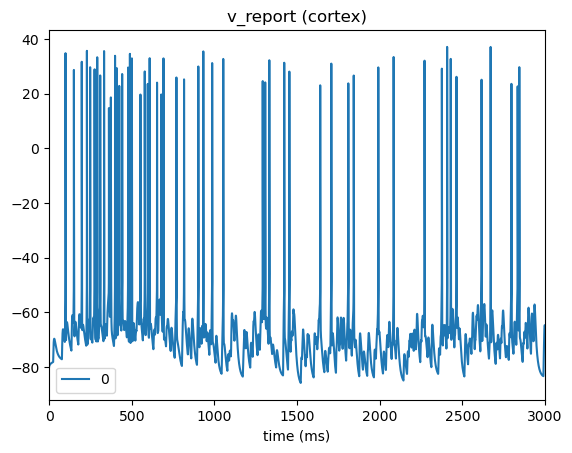

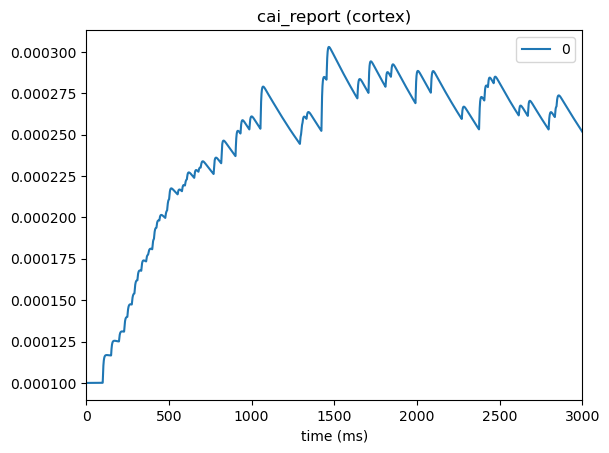

In [48]:
from bmtk.analyzer.compartment import plot_traces

_ = plot_traces(config_file='my_sim02/config.json', node_ids=[0], report_name='v_report')
_ = plot_traces(config_file='my_sim02/config.json', node_ids=[0], report_name='cai_report')
